In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('karnataka.csv')

In [10]:
df = pd.DataFrame(data)
df

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27,Alluvial,Drip,2570,57.0,Coconut,200000.0,Kharif
1,2004,Mangalore,13283,2903.1,27,Alluvial,Drip,27170,57.5,Coconut,4847.0,Kharif
2,2004,Mangalore,52119,2903.1,27,Alluvial,Drip,114744,57.0,Coconut,51239.0,Kharif
3,2004,Mangalore,725,2996.6,27,Alluvial,Drip,1402,55.0,Coconut,216396.0,Kharif
4,2004,Mangalore,12885,2996.6,27,Alluvial,Drip,23456,56.0,Coconut,2644.0,Kharif
...,...,...,...,...,...,...,...,...,...,...,...,...
3153,2013,Davangere,46990,3296,27,NaN,Drip,107809,53.5,Coconut,51239.0,Rabi
3154,2014,Davangere,103,3296,27,NaN,Drip,1132,52.5,Coconut,216396.0,Rabi
3155,2015,Davangere,8239,3550,27,NaN,Drip,23960,56.0,Coconut,2644.0,Rabi
3156,2016,Davangere,44563,3550,27,NaN,Drip,126487,57.0,Coconut,44235.0,Rabi


In [11]:
df.shape

(3158, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3158 non-null   int64  
 1   Location     3158 non-null   object 
 2   Area         3155 non-null   object 
 3   Rainfall     3157 non-null   object 
 4   Temperature  3157 non-null   object 
 5   Soil type    3100 non-null   object 
 6   Irrigation   3156 non-null   object 
 7   yeilds       3158 non-null   object 
 8   Humidity     3156 non-null   float64
 9   Crops        3156 non-null   object 
 10  price        3157 non-null   float64
 11  Season       3157 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 296.2+ KB


In [13]:
df.describe(include="all")

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
count,3158.000000,3158,3155,3157,3157,3100,3156,3158,3156.000000,3156,3157.000000,3157
unique,NaN,11,157,23,107,27,3,163,NaN,13,NaN,3
top,NaN,Hassan,4,2903.1,27,Alluvial,Drip,187,NaN,Coconut,NaN,Rabi
freq,NaN,798,54,306,672,459,1310,60,NaN,1456,NaN,1742
mean,2009.929702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.581274,NaN,86532.987646,NaN
std,5.100895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.470190,NaN,94892.570873,NaN
min,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,637.000000,NaN
25%,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.000000,NaN,2644.000000,NaN
50%,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.000000,NaN,45186.000000,NaN
75%,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,203317.000000,NaN


In [14]:
df.isna().sum()

Year            0
Location        0
Area            3
Rainfall        1
Temperature     1
Soil type      58
Irrigation      2
yeilds          0
Humidity        2
Crops           2
price           1
Season          1
dtype: int64

In [15]:
def Describe(df):

    Variables =[]
    Dtypes = []
    Count = []
    Unique = []
    Missing = []

    for columns in df.columns:

        Variables.append(columns)
        Dtypes.append(df[columns].dtype)
        Count.append(len(df[columns]))
        Unique.append(len(df[columns].unique()))
        Missing.append(df[columns].isna().sum())

    output = pd.DataFrame({
        'Variables':Variables,
        'Dtypes':Dtypes,
        'Count':Count,
        'Unique':Unique,
        'Missing':Missing,
    })
    return output
    
Describe(df)

,Variables,Dtypes,Count,Unique,Missing
0,Year,int64,3158,16,0
1,Location,object,3158,11,0
2,Area,object,3158,158,3
3,Rainfall,object,3158,24,1
4,Temperature,object,3158,108,1
5,Soil type,object,3158,28,58
6,Irrigation,object,3158,4,2
7,yeilds,object,3158,163,0
8,Humidity,float64,3158,20,2
9,Crops,object,3158,14,2


In [16]:
# we want to find precentage of missing value
precent_missing = df.isna().sum() * 100 / len(df)

missing_value_df = pd.DataFrame({
    'Column_Name':df.columns,
    'Precentage':precent_missing,
})
missing_value_df

,Column_Name,Precentage
Year,Year,0.000000
Location,Location,0.000000
Area,Area,0.094997
Rainfall,Rainfall,0.031666
Temperature,Temperature,0.031666
Soil type,Soil type,1.836605
Irrigation,Irrigation,0.063331
yeilds,yeilds,0.000000
Humidity,Humidity,0.063331
Crops,Crops,0.063331


In [17]:
df.nunique()

Year            16
Location        11
Area           157
Rainfall        23
Temperature    107
Soil type       27
Irrigation       3
yeilds         163
Humidity        19
Crops           13
price           25
Season           3
dtype: int64

In [18]:
for columns in df.columns:
    print(f'unique value for {columns}: ')
    print(df[columns].unique())
    print('--' * 40)

unique value for Year: 
[2004 2013 2014 2015 2016 2017 2018 2005 2006 2007 2008 2009 2010 2011
 2012 2019]
--------------------------------------------------------------------------------
unique value for Location: 
['Mangalore' 'Kodagu' 'Kasaragodu' 'Raichur' 'Gulbarga' 'Madikeri'
 'Hassan' 'Mysuru' 'Chikmangaluru' 'Bangalore' 'Davangere']
--------------------------------------------------------------------------------
unique value for Area: 
['1279' '13283' '52119' '725' '12885' '51179' '468' '11841' '50975' '206'
 '10922' '51390' '177' '10723' '51709' '146' '10910' '51355' '160' '10912'
 '51353' '142' '10505' '51040' '154' '10318' '48083' '143' '9283' '47200'
 '158' '8982' '46990' '103' '8239' '44563' '96' '6949' '44663' '110'
 '6824' '43013' '95' '6441' '4012' '4877' '4930' '4954' '5019' '5127'
 '5174' '5294' '5474' '5864' '7028' '7403' '7501' '7714' '7856' '32' '1'
 '30' '6' '15' '4' '39' '12' '3' '17' '9' '21' '11' '8' '29' '13736'
 '14003' '14179' '14319' '14464' '14876' '14976'

In [19]:
for columns in df.columns:
    print(f'value counts for {columns}: ')
    print(df[columns].value_counts())
    print('--' * 40)

value counts for Year: 
Year
2004    914
2017    222
2016    216
2015    192
2013    186
2014    186
2018    186
2012    144
2005    132
2011    132
2006    126
2007    126
2008    126
2009    126
2010    126
2019     18
Name: count, dtype: int64
--------------------------------------------------------------------------------
value counts for Location: 
Location
Hassan           798
Gulbarga         504
Mangalore        342
Chikmangaluru    340
Madikeri         240
Kasaragodu       231
Raichur          231
Mysuru           222
Kodagu           192
Davangere         42
Bangalore         16
Name: count, dtype: int64
--------------------------------------------------------------------------------
value counts for Area: 
Area
4      54
177    52
206    52
15     36
6      36
       ..
345     8
68      8
7       8
933     8
_       1
Name: count, Length: 157, dtype: int64
--------------------------------------------------------------------------------
value counts for Rainfall: 
Rainfall
2

In [20]:
df.columns

Index(['Year', 'Location', 'Area', 'Rainfall', 'Temperature', 'Soil type',
       'Irrigation', 'yeilds', 'Humidity', 'Crops', 'price', 'Season'],
      dtype='object')

In [21]:
df.rename(columns={'yeilds': 'yields'}, inplace=True)
df

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yields,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27,Alluvial,Drip,2570,57.0,Coconut,200000.0,Kharif
1,2004,Mangalore,13283,2903.1,27,Alluvial,Drip,27170,57.5,Coconut,4847.0,Kharif
2,2004,Mangalore,52119,2903.1,27,Alluvial,Drip,114744,57.0,Coconut,51239.0,Kharif
3,2004,Mangalore,725,2996.6,27,Alluvial,Drip,1402,55.0,Coconut,216396.0,Kharif
4,2004,Mangalore,12885,2996.6,27,Alluvial,Drip,23456,56.0,Coconut,2644.0,Kharif
...,...,...,...,...,...,...,...,...,...,...,...,...
3153,2013,Davangere,46990,3296,27,NaN,Drip,107809,53.5,Coconut,51239.0,Rabi
3154,2014,Davangere,103,3296,27,NaN,Drip,1132,52.5,Coconut,216396.0,Rabi
3155,2015,Davangere,8239,3550,27,NaN,Drip,23960,56.0,Coconut,2644.0,Rabi
3156,2016,Davangere,44563,3550,27,NaN,Drip,126487,57.0,Coconut,44235.0,Rabi


In [22]:
def clean_column_to_numeric(df, col):
    # Step 1: Make sure it's string
    df[col] = df[col].astype(str).str.strip()

    # Step 2: Replace common bad values with np.nan
    fake_nan_values = ['_', '?', '', 'nan', 'NaN', 'NAN']
    df[col] = df[col].replace(fake_nan_values, np.nan)

    # Step 3: Remove extra symbols (keep only digits, '.', and '-')
    df[col] = df[col].str.replace(r'[^0-9.\-]', '', regex=True)

    # Step 4: Convert to float (invalid values will become NaN)
    df[col] = pd.to_numeric(df[col], errors='coerce')

    return df



In [23]:
columns_to_clean = ['Area', 'Rainfall', 'Temperature', 'yields']

for col in columns_to_clean:
    if col in df.columns:
        df = clean_column_to_numeric(df, col)


In [24]:
df = df.dropna(subset=columns_to_clean)

In [25]:
df

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yields,Humidity,Crops,price,Season
0,2004,Mangalore,1279.0,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000.0,Kharif
1,2004,Mangalore,13283.0,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847.0,Kharif
2,2004,Mangalore,52119.0,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239.0,Kharif
3,2004,Mangalore,725.0,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396.0,Kharif
4,2004,Mangalore,12885.0,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644.0,Kharif
...,...,...,...,...,...,...,...,...,...,...,...,...
3153,2013,Davangere,46990.0,3296.0,27.0,NaN,Drip,107809.0,53.5,Coconut,51239.0,Rabi
3154,2014,Davangere,103.0,3296.0,27.0,NaN,Drip,1132.0,52.5,Coconut,216396.0,Rabi
3155,2015,Davangere,8239.0,3550.0,27.0,NaN,Drip,23960.0,56.0,Coconut,2644.0,Rabi
3156,2016,Davangere,44563.0,3550.0,27.0,NaN,Drip,126487.0,57.0,Coconut,44235.0,Rabi


In [26]:
df = df.dropna()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3084 entries, 0 to 3099
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3084 non-null   int64  
 1   Location     3084 non-null   object 
 2   Area         3084 non-null   float64
 3   Rainfall     3084 non-null   float64
 4   Temperature  3084 non-null   float64
 5   Soil type    3084 non-null   object 
 6   Irrigation   3084 non-null   object 
 7   yields       3084 non-null   float64
 8   Humidity     3084 non-null   float64
 9   Crops        3084 non-null   object 
 10  price        3084 non-null   float64
 11  Season       3084 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 313.2+ KB


In [28]:
print(df.dtypes)
print(df.isna().sum())

Year             int64
Location        object
Area           float64
Rainfall       float64
Temperature    float64
Soil type       object
Irrigation      object
yields         float64
Humidity       float64
Crops           object
price          float64
Season          object
dtype: object
Year           0
Location       0
Area           0
Rainfall       0
Temperature    0
Soil type      0
Irrigation     0
yields         0
Humidity       0
Crops          0
price          0
Season         0
dtype: int64


In [29]:
print(df['Temperature'].min())
print(df['Temperature'].max())

26.8
222.0


## Visualizing numeric columns using Histplot

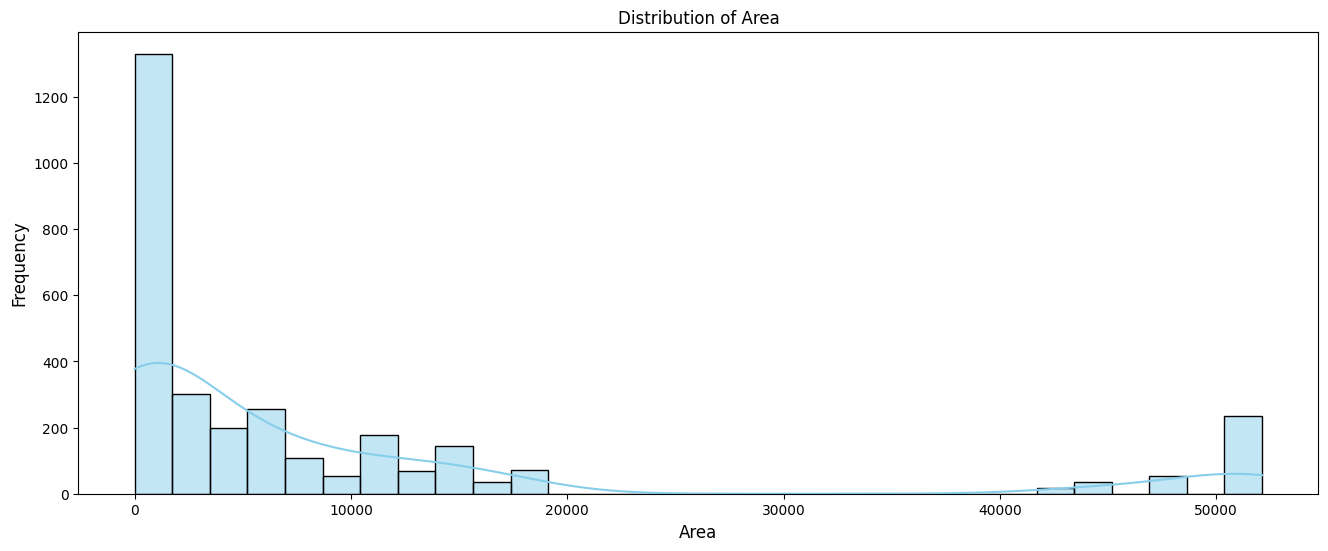

------------------------------------------------------------------------------------------------------------------------------------------


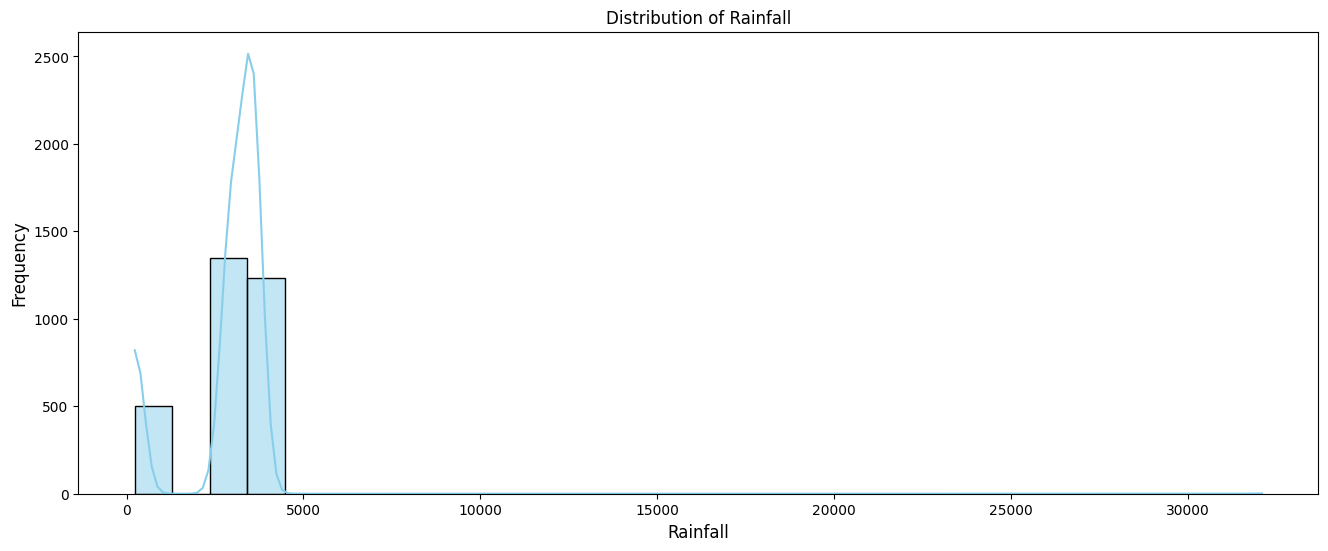

------------------------------------------------------------------------------------------------------------------------------------------


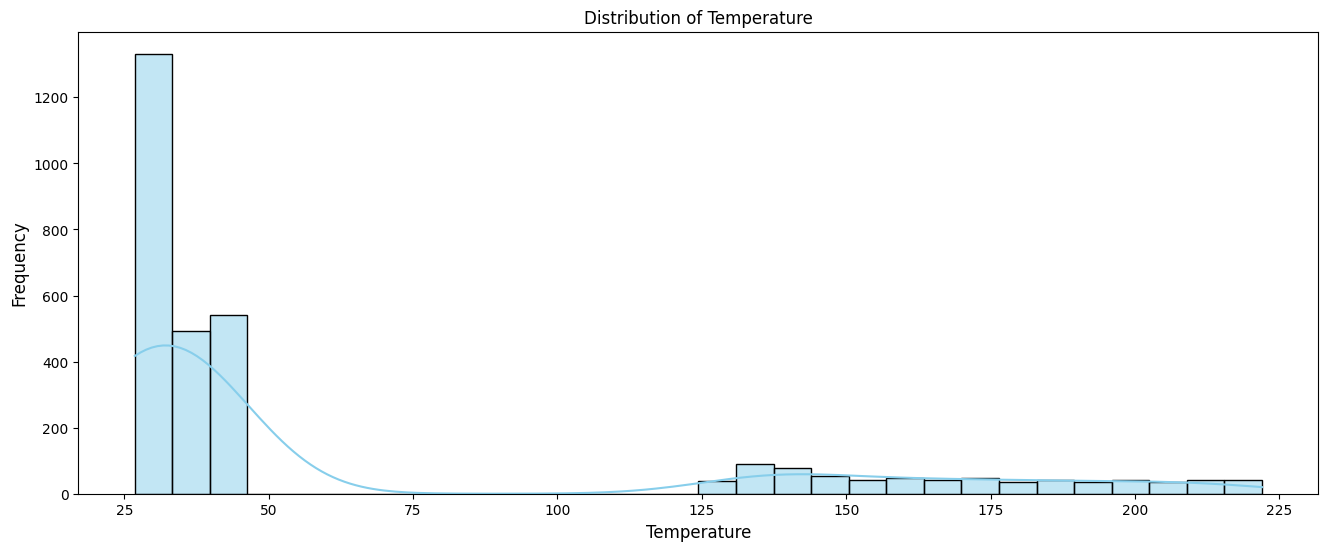

------------------------------------------------------------------------------------------------------------------------------------------


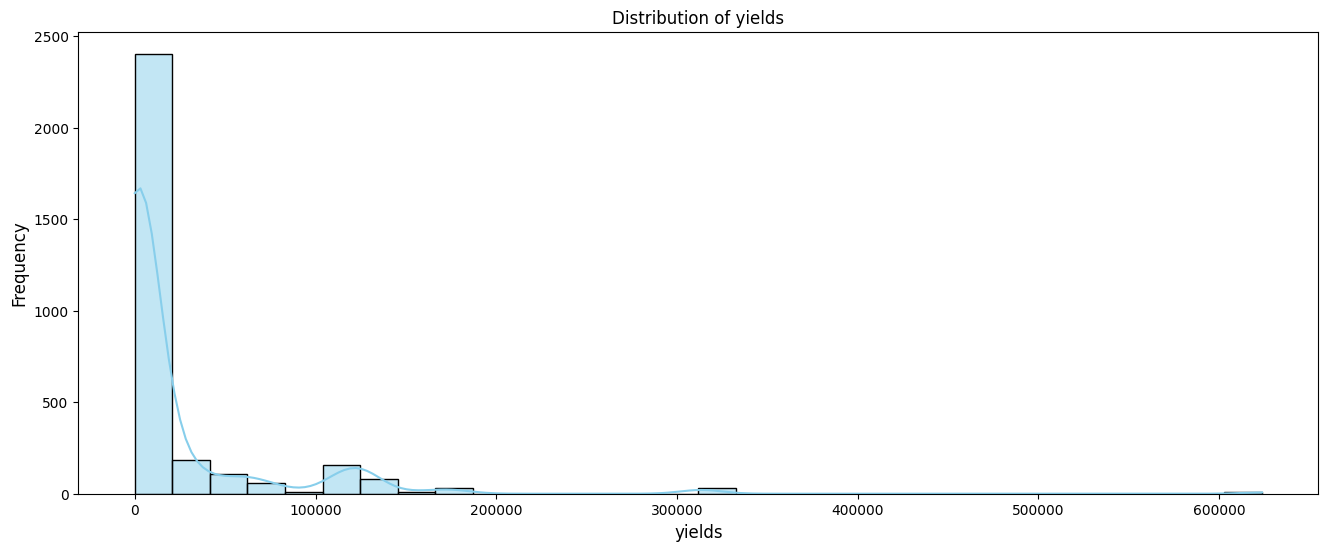

------------------------------------------------------------------------------------------------------------------------------------------


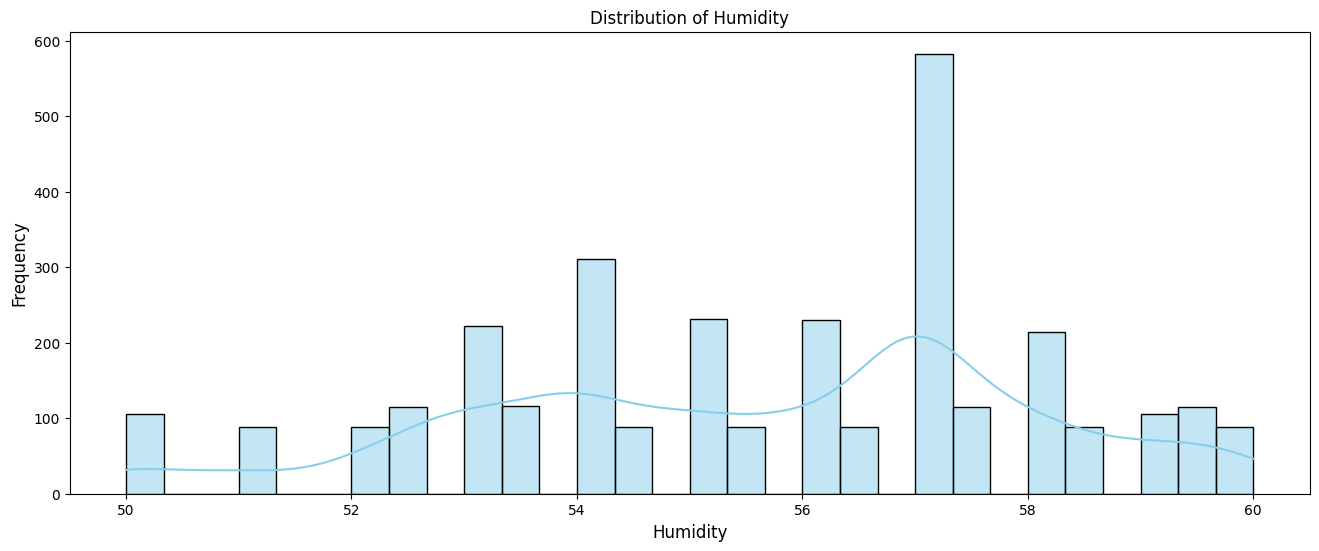

------------------------------------------------------------------------------------------------------------------------------------------


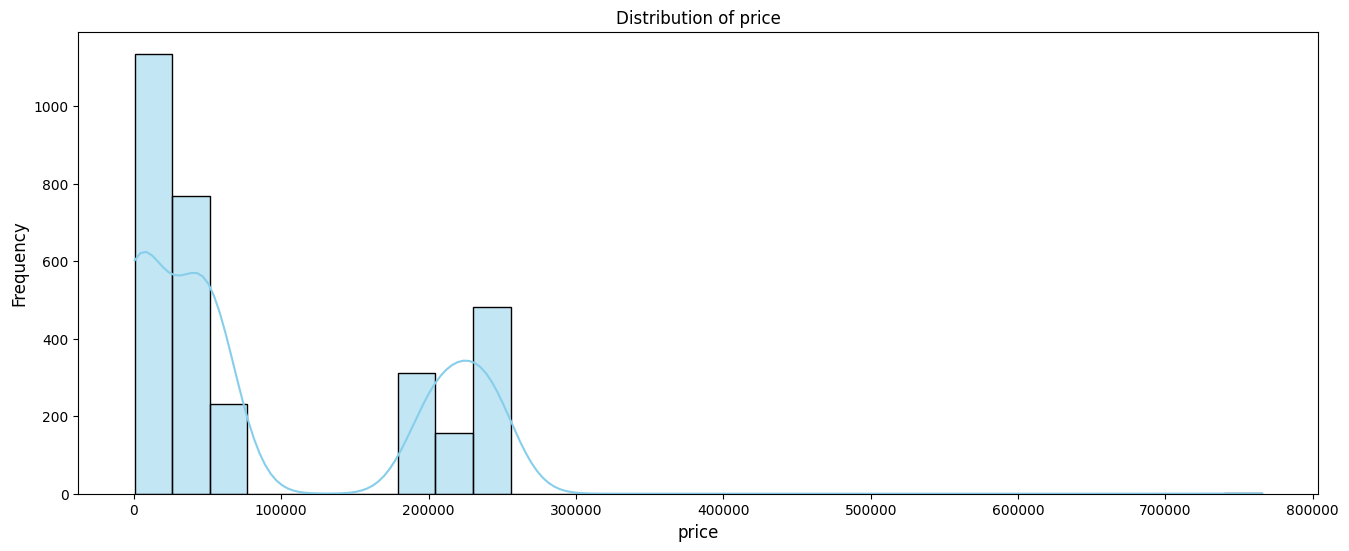

------------------------------------------------------------------------------------------------------------------------------------------


In [30]:
numeric_cols = ['Area', 'Rainfall', 'Temperature', 'yields', 'Humidity', 'price']

# Create a histogram for each column
for col in numeric_cols:
    if col in df.columns:
        plt.figure(figsize=(16, 6))
        sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col}', fontsize=12)
        plt.xlabel(f'{col}', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.show()

        print('------' * 23)


## visualizing categorical columns using count plot

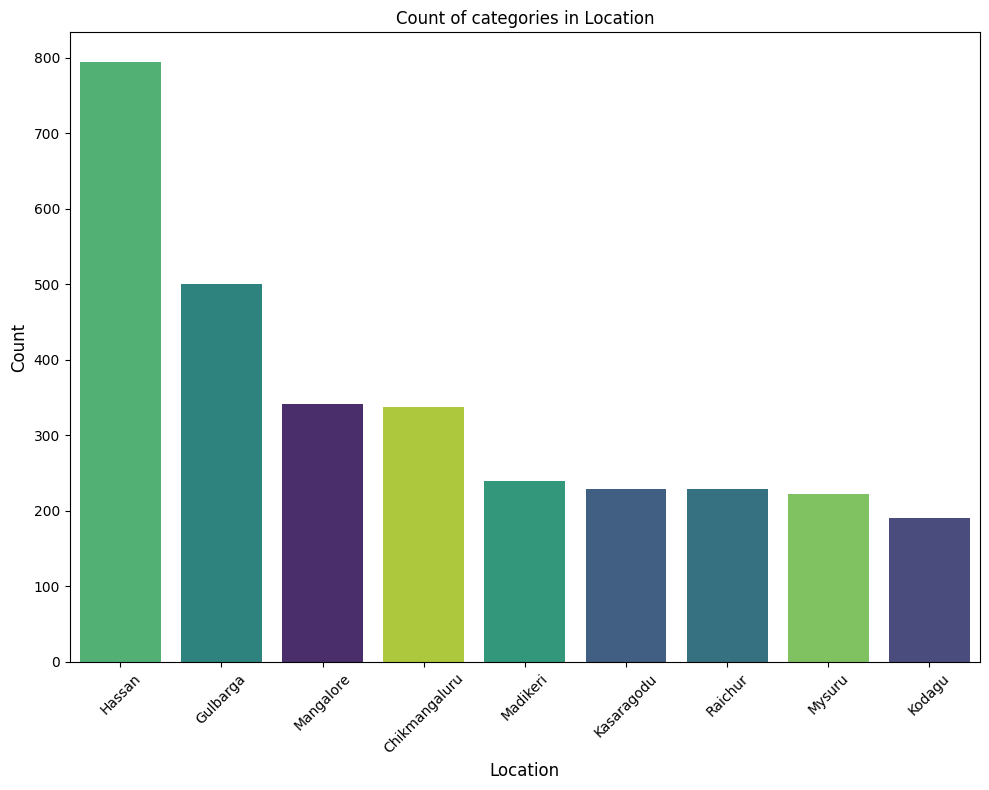

------------------------------------------------------------


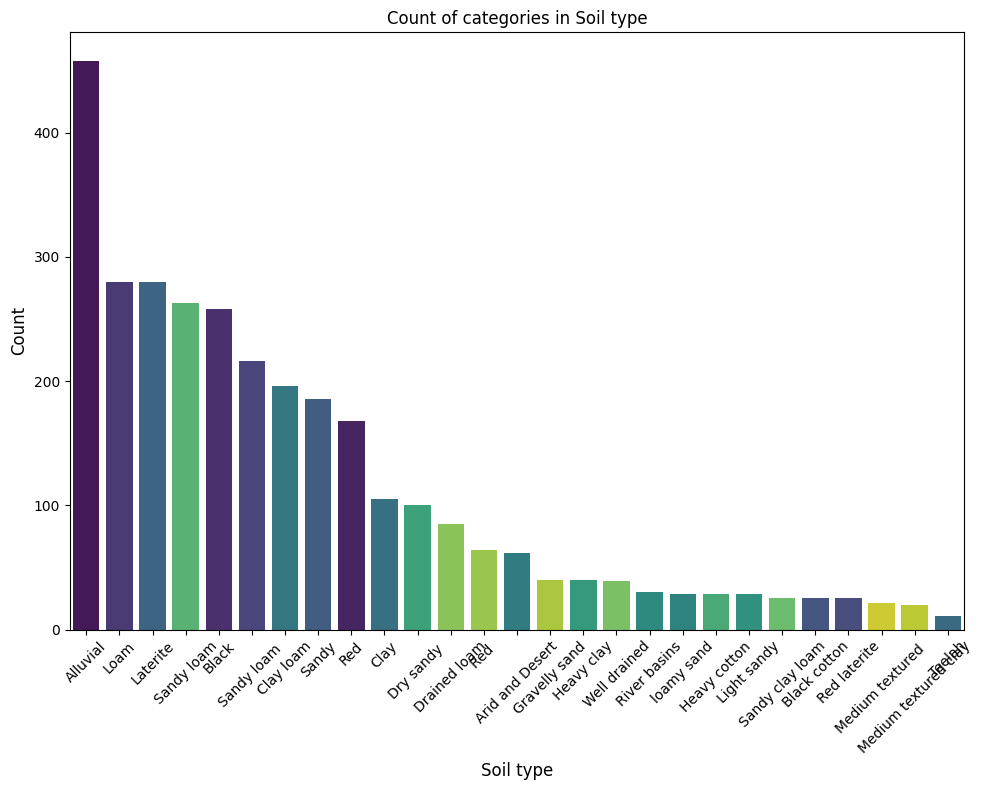

------------------------------------------------------------


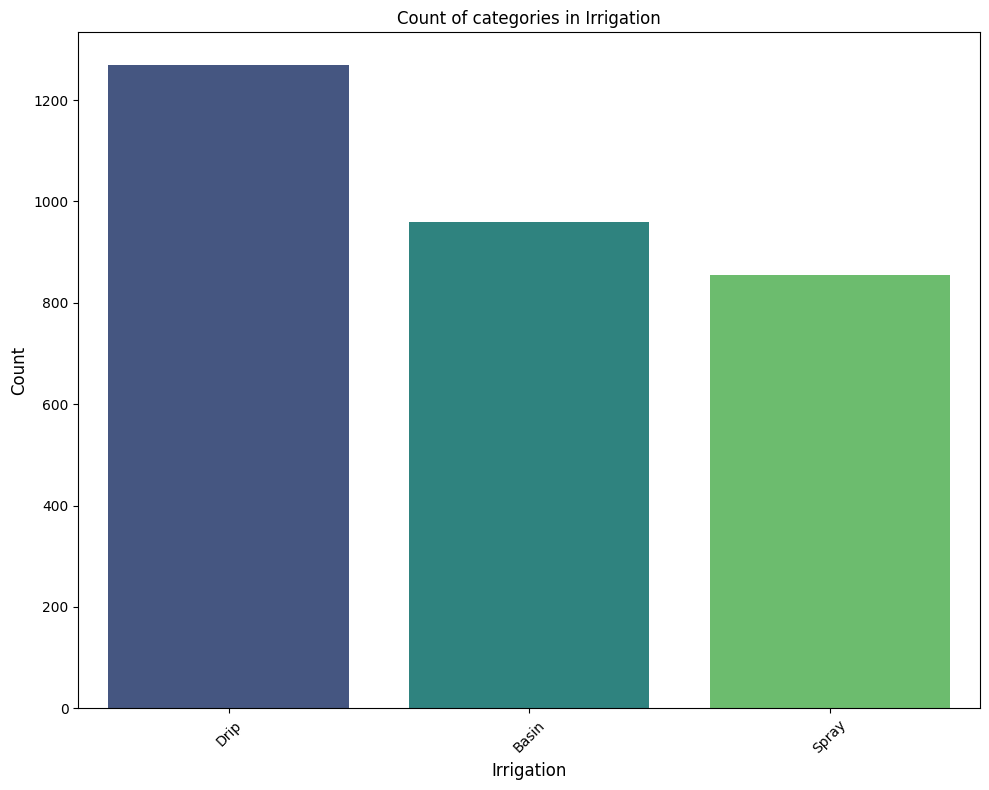

------------------------------------------------------------


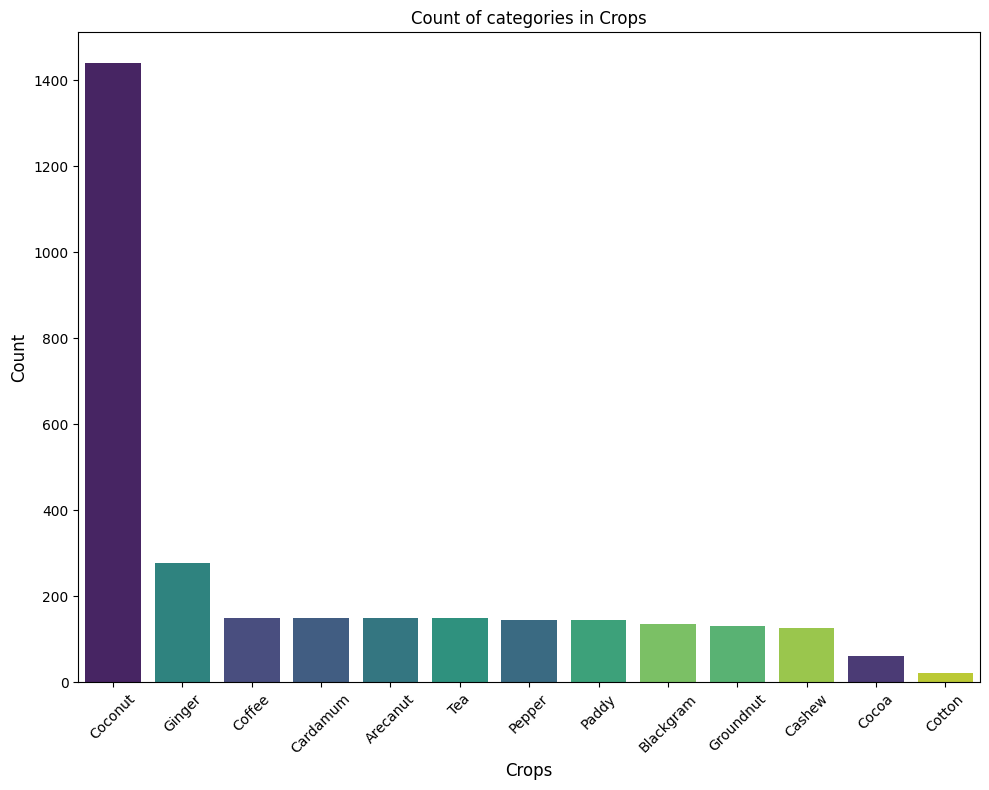

------------------------------------------------------------


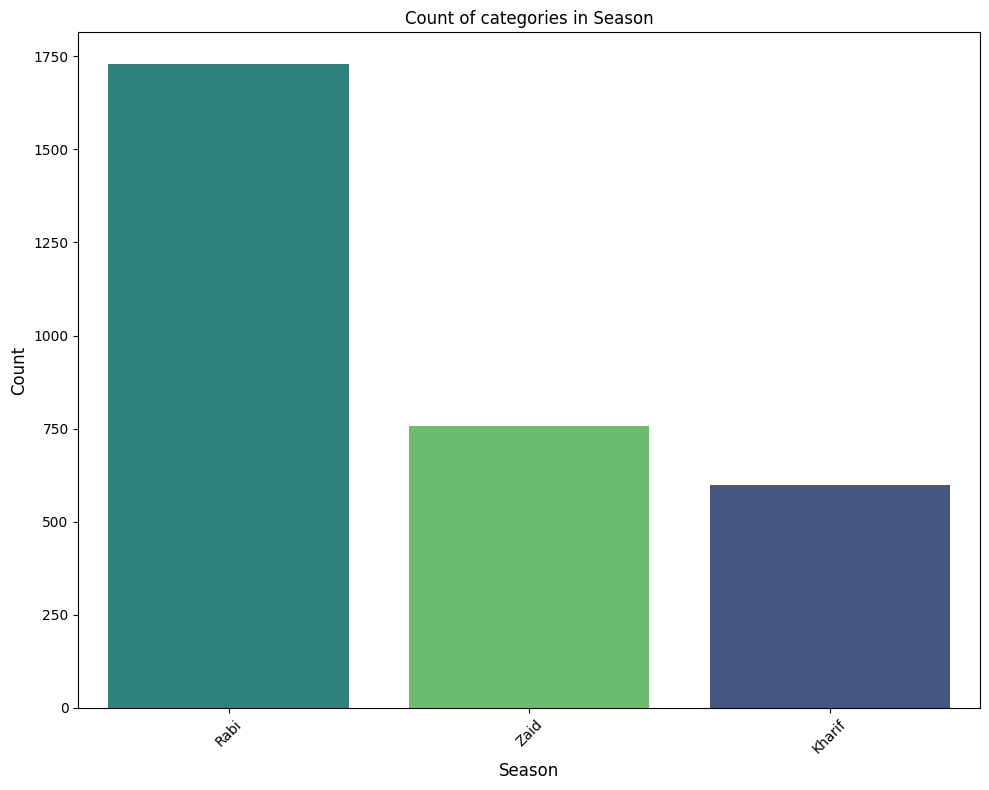

------------------------------------------------------------


In [31]:
categorical_cols = ['Location', 'Soil type', 'Irrigation', 'Crops', 'Season']

for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 8))
        sns.countplot(data=df, x=col, hue=col, order=df[col].value_counts().index, palette='viridis', legend=False)
        plt.title(f'Count of categories in {col}')
        plt.xticks(rotation=45)
        plt.xlabel(f'{col}', fontsize= 12)
        plt.ylabel('Count', fontsize= 12)
        plt.tight_layout()
        plt.show()
        print('------' * 10)

## Cleaning price column and plotting it again

In [32]:
df.loc[df['price'] > 100000, 'price'] = df.loc[df['price'] > 100000, 'price'] / 10

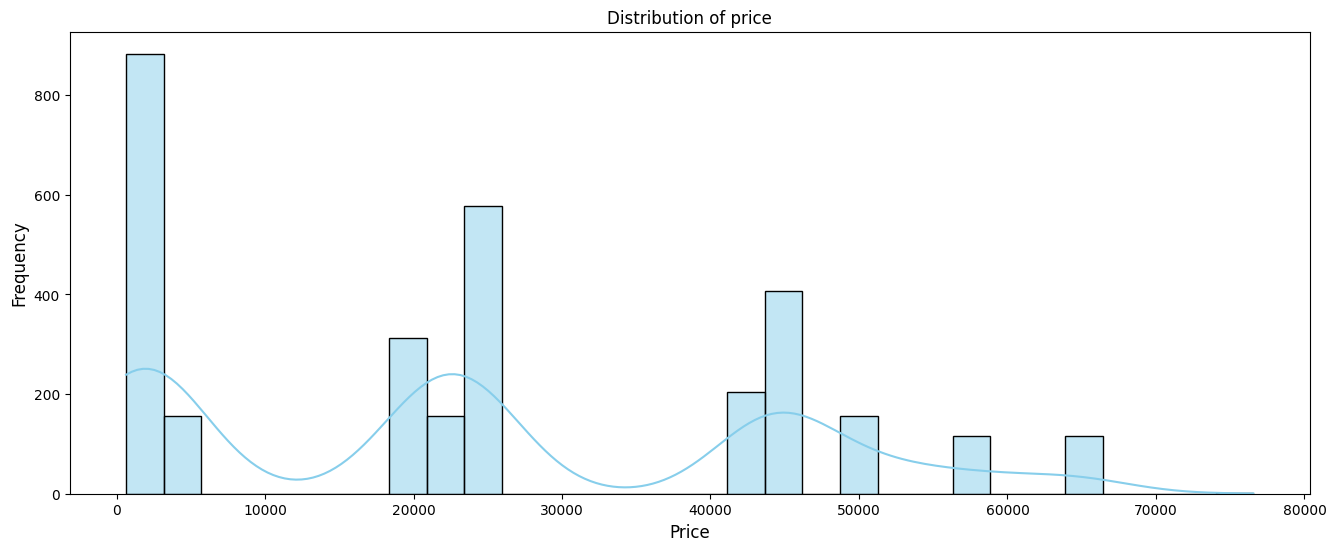

In [33]:
plt.figure(figsize=(16, 6))
sns.histplot(data= df, x= 'price', kde=True, bins=30, color='skyblue')
plt.title('Distribution of price')
plt.xlabel('Price', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
plt.show()

## Cleaning Area column and plotting it again

In [34]:
df.loc[df['Area'] > 20000, 'Area'] = df.loc[df['Area'] > 20000, 'Area'] / 10

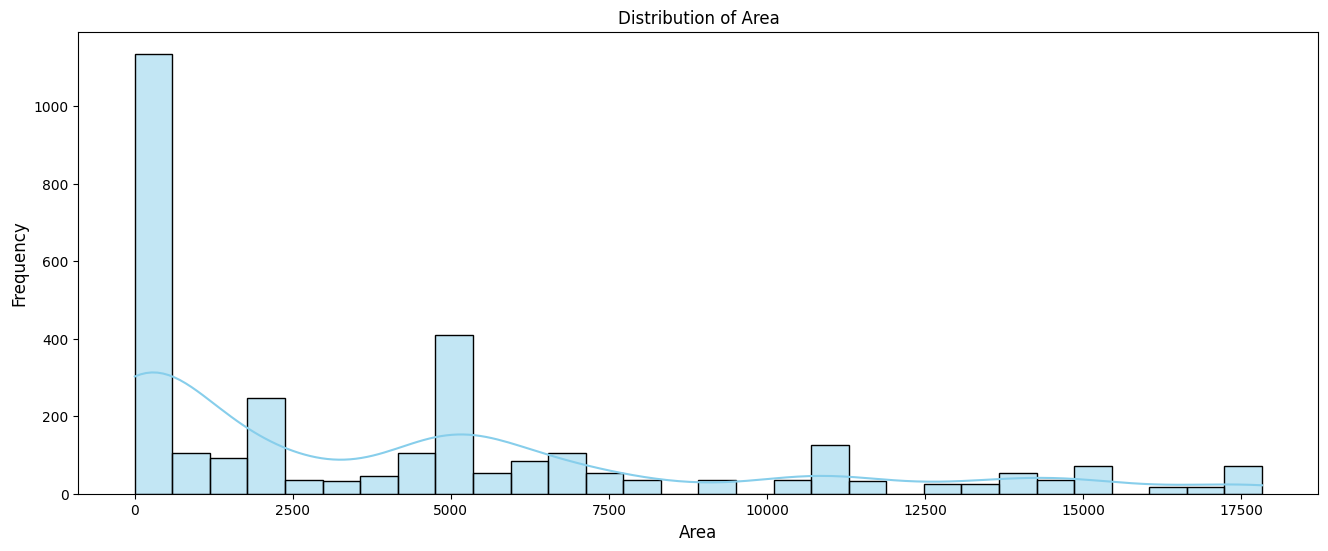

In [35]:
plt.figure(figsize=(16, 6))
sns.histplot(data= df, x= 'Area', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Area')
plt.xlabel('Area', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
plt.show()

# Before I saw a wide range of numbers that was between 0 to 30000 in Rainfall , now I wanrt to see plot it first (0, 5000) and second (5000 to 30000)

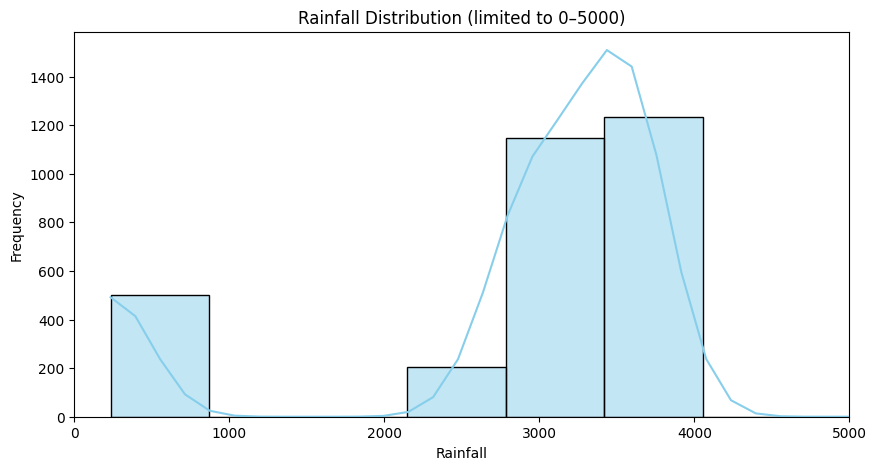

In [36]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Rainfall'], bins=50, color='skyblue', kde=True)
plt.xlim(0, 5000)  # Only show range up to 5000
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.title('Rainfall Distribution (limited to 0–5000)')
plt.show()

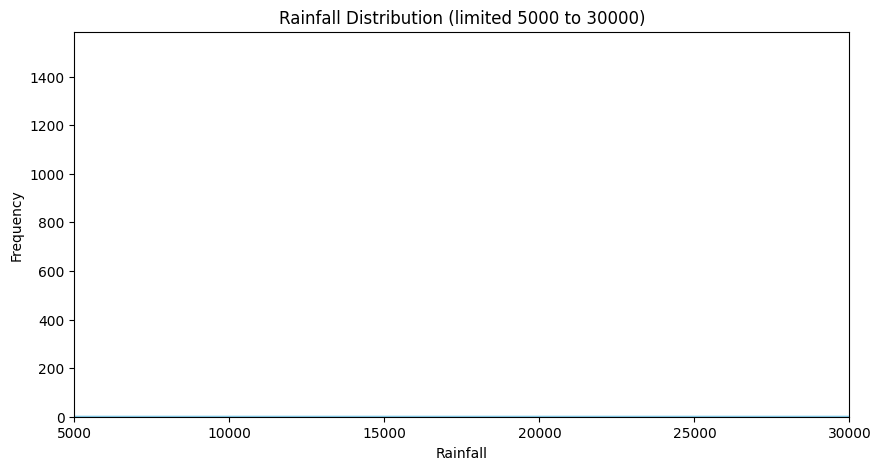

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Rainfall'], bins=50, color='skyblue', kde=True)
plt.xlim(5000, 30000)  # Only show range between 5000 to 30000 
plt.xlabel('Rainfall') 
plt.ylabel('Frequency')
plt.title('Rainfall Distribution (limited 5000 to 30000)')
plt.show()

# I check values again and find that there are no values that are bigger than 4000

In [38]:
rainfall_high = df[df['Rainfall'] > 4000]
print(f"Number of rows where Rainfall > 4000: {len(rainfall_high)}")

Number of rows where Rainfall > 4000: 1


In [39]:
df[df['Rainfall'] > 4000]

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yields,Humidity,Crops,price,Season
165,2017,Gulbarga,66.0,32096.0,162.0,Black,Drip,5518.0,57.0,Cardamum,24848.0,Kharif


In [40]:
df_new = df[df['Rainfall'] <= 4000]

In [41]:
print(df_new['Rainfall'].max())
print(df_new['Rainfall'].min())

3729.8
233.0


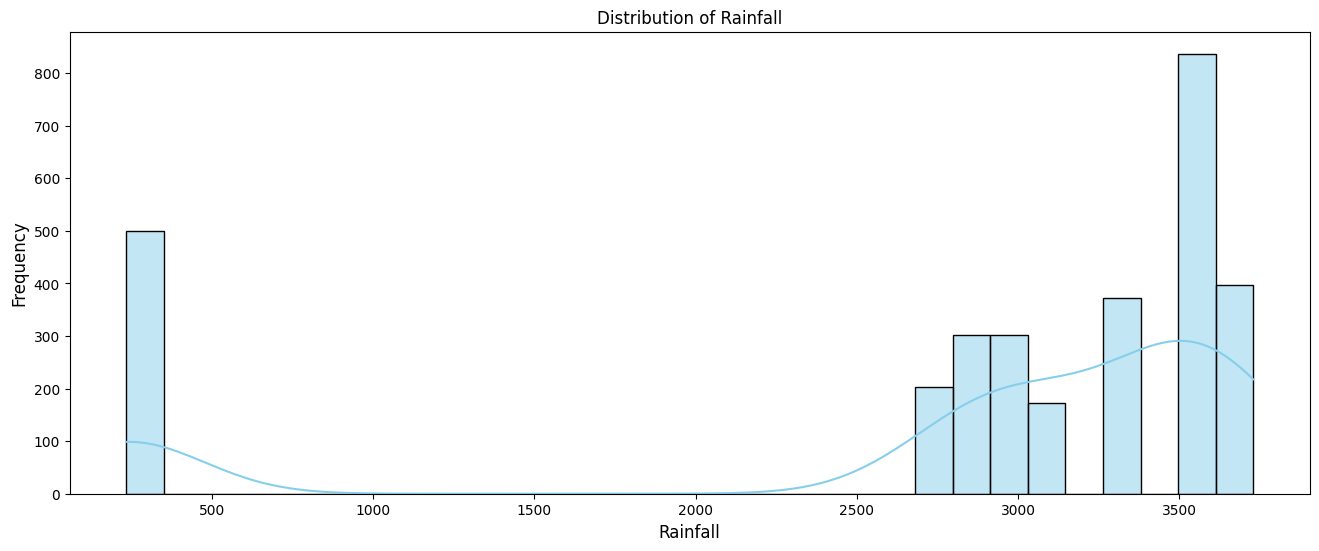

In [42]:
plt.figure(figsize=(16, 6))
sns.histplot(data= df_new, x= 'Rainfall', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
plt.show()

In [43]:
df_new.loc[df_new['yields'] > 200000 , 'yields'] = df_new.loc[df_new['yields'] > 200000 , 'yields'] / 10

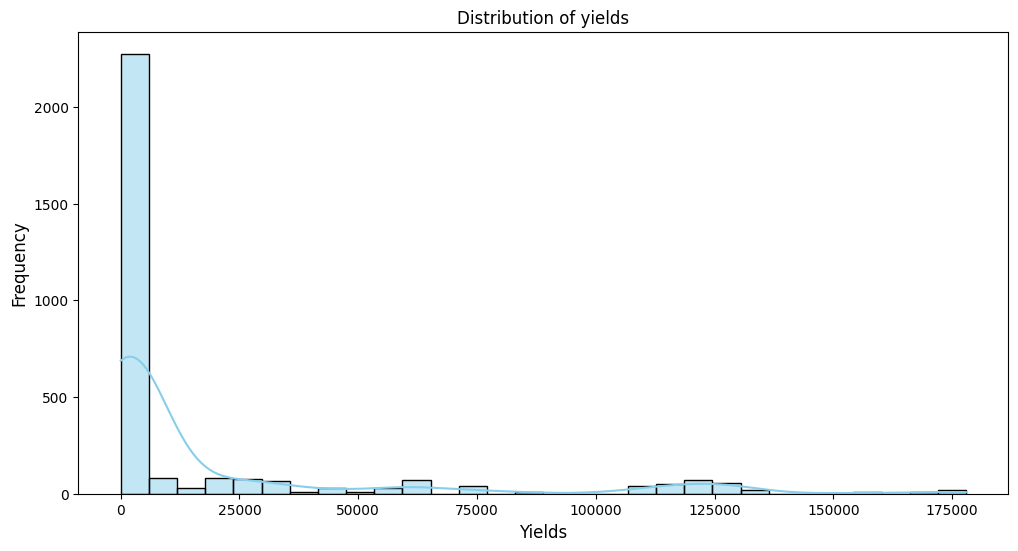

In [44]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_new, x= 'yields', kde= True, bins= 30, color= 'skyblue')
plt.title('Distribution of yields', fontsize= 12)
plt.xlabel('Yields', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
plt.show()

## re-plot after remove Rainfall outlier

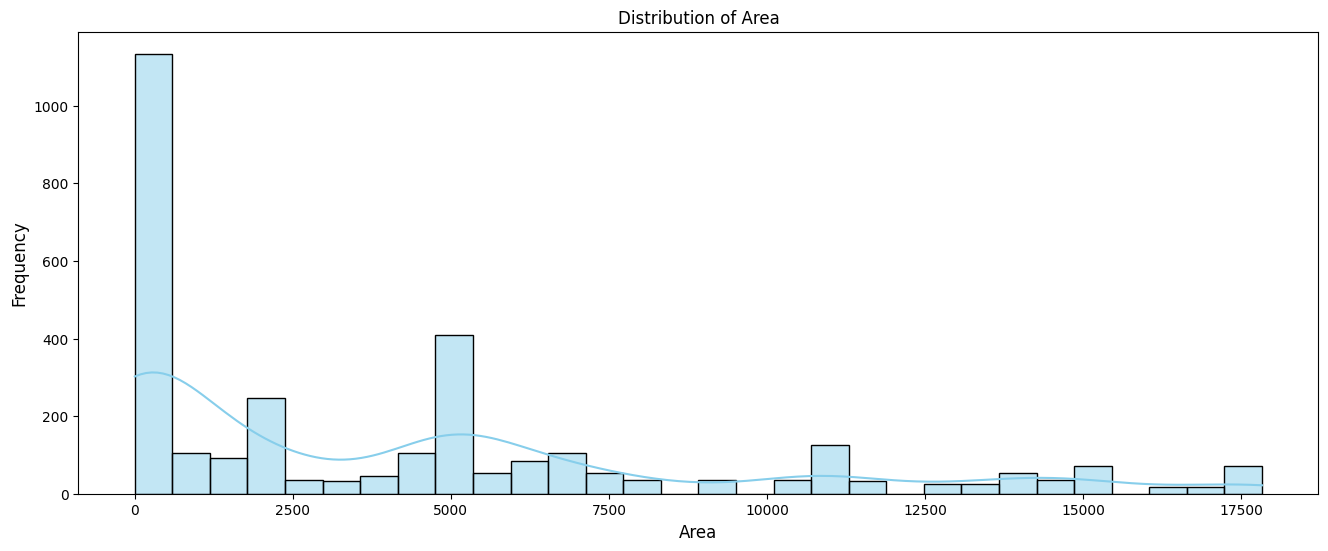

------------------------------------------------------------------------------------------------------------------------------------------


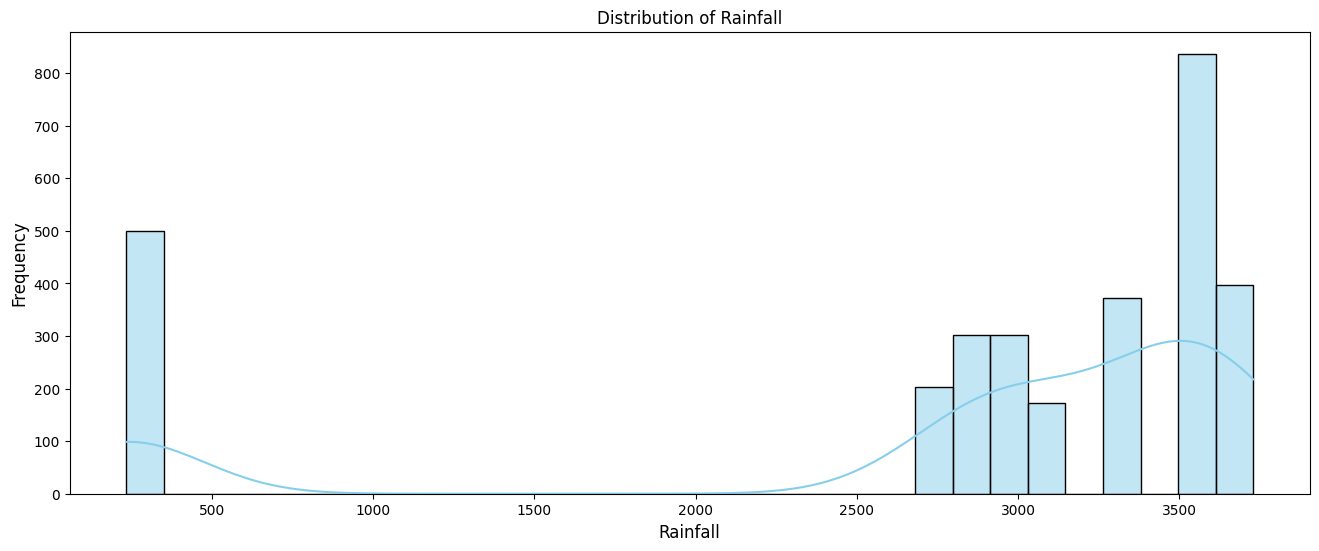

------------------------------------------------------------------------------------------------------------------------------------------


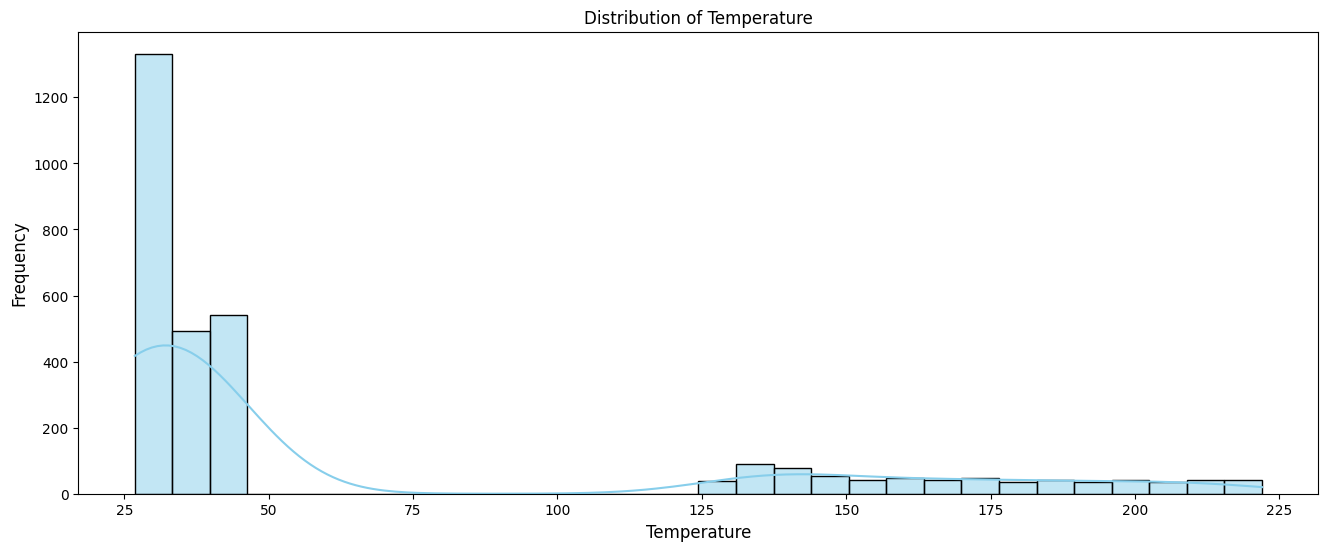

------------------------------------------------------------------------------------------------------------------------------------------


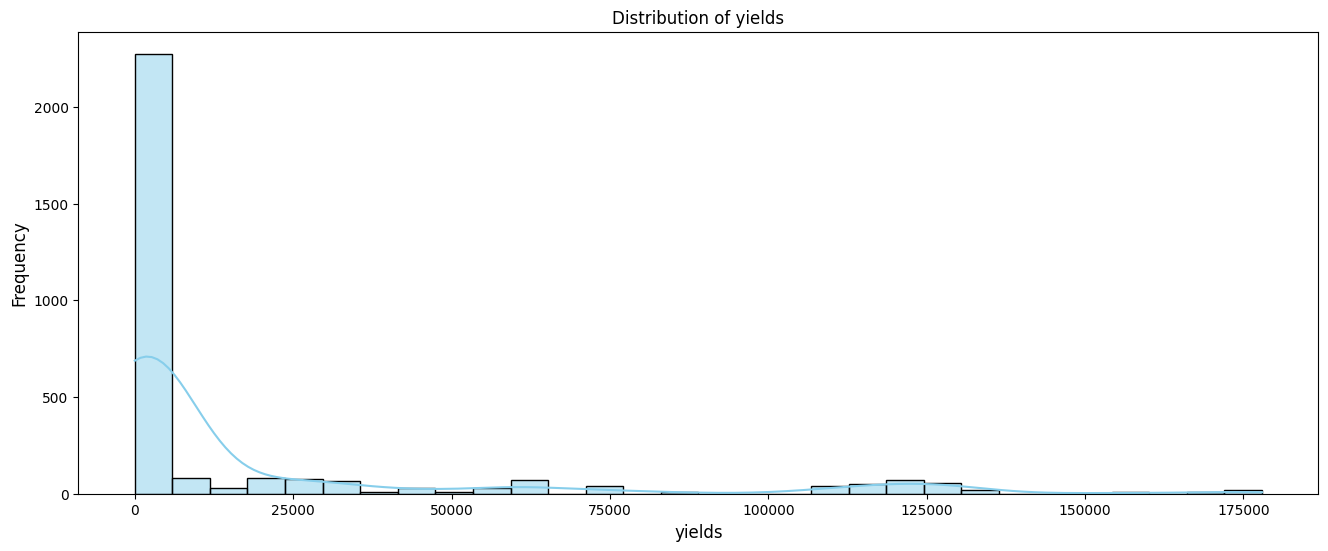

------------------------------------------------------------------------------------------------------------------------------------------


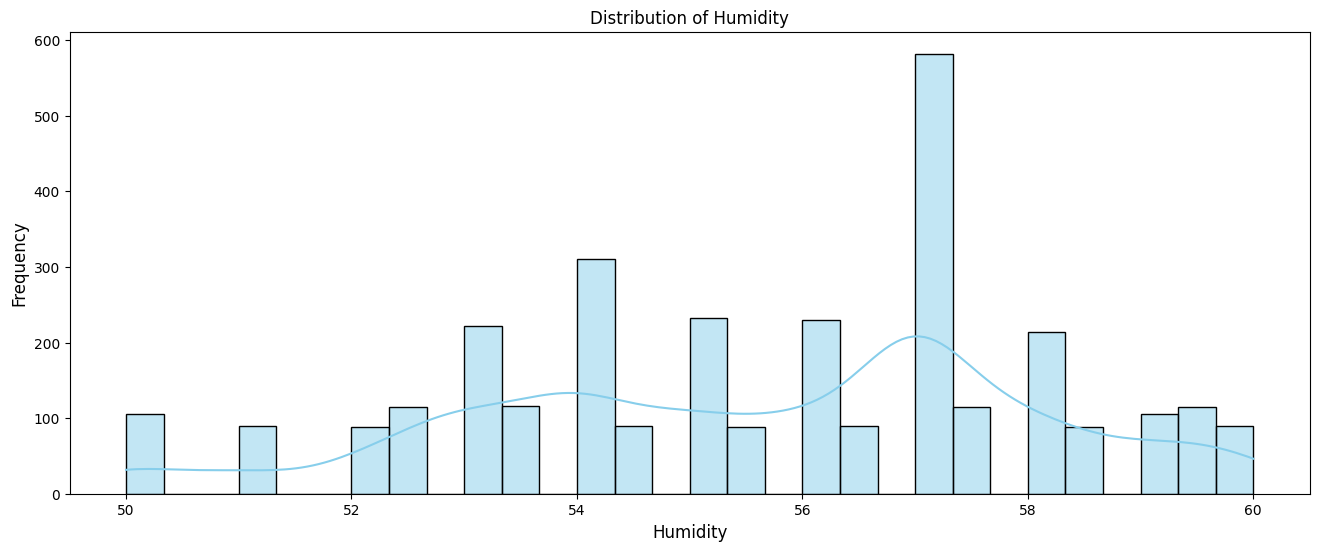

------------------------------------------------------------------------------------------------------------------------------------------


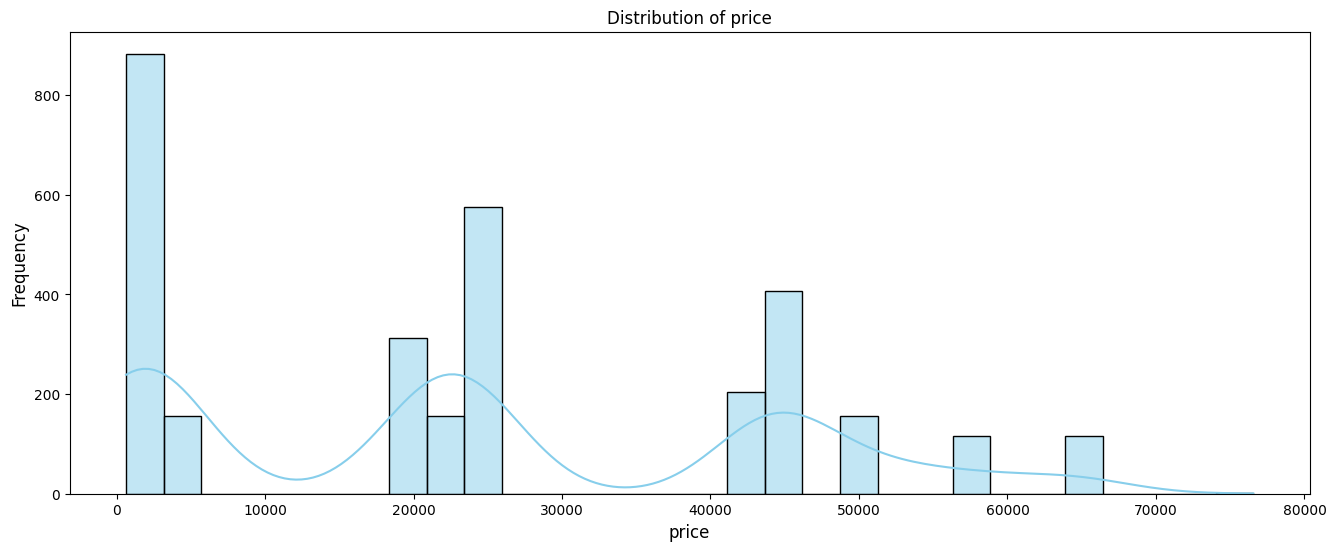

------------------------------------------------------------------------------------------------------------------------------------------


In [45]:
numeric_cols = ['Area', 'Rainfall', 'Temperature', 'yields', 'Humidity', 'price']

# Create a histogram for each column
for col in numeric_cols:
    if col in df.columns:
        plt.figure(figsize=(16, 6))
        sns.histplot(data=df_new, x=col, kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col}', fontsize=12)
        plt.xlabel(f'{col}', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.show()

        print('------' * 23)

# Cleaning Rainfall column and plot it again

In [46]:
df_new.loc[df_new['Rainfall'] > 500, 'Rainfall'] = df_new.loc[df_new['Rainfall'] > 500, 'Rainfall'] / 10

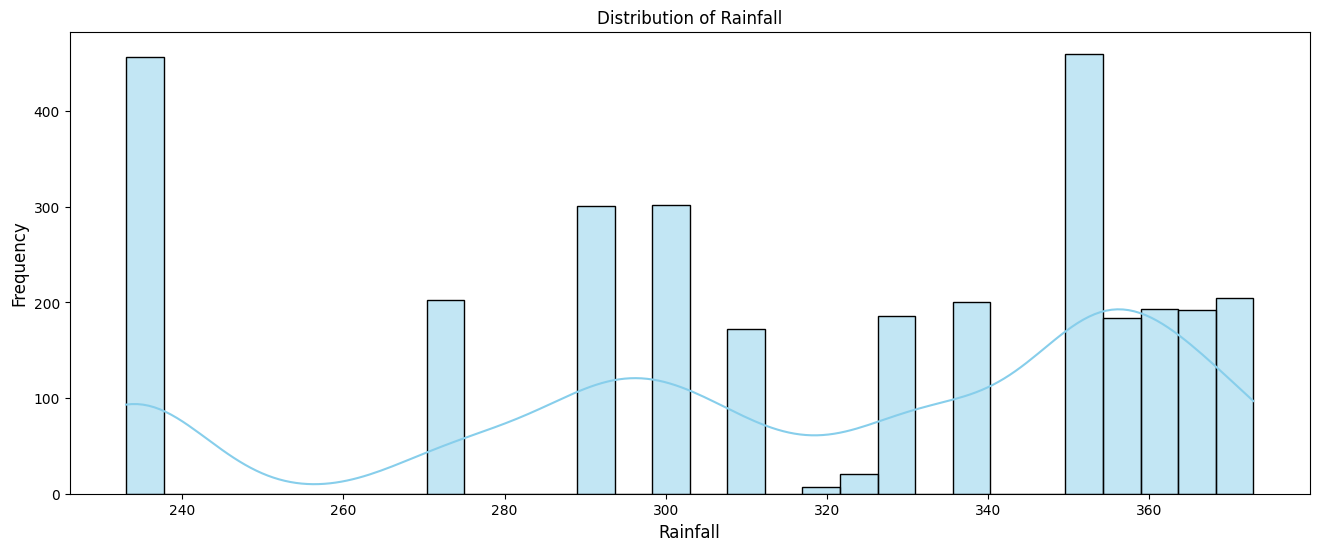

In [47]:
plt.figure(figsize=(16, 6))
sns.histplot(data= df_new, x= 'Rainfall', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
plt.show()

# I Clean some values that I think they are Farenhit

In [48]:
df_new.loc[df_new['Temperature'] > 50, 'Temperature'] = (df_new.loc[df_new['Temperature'] > 50, 'Temperature'] - 32) / 1.8

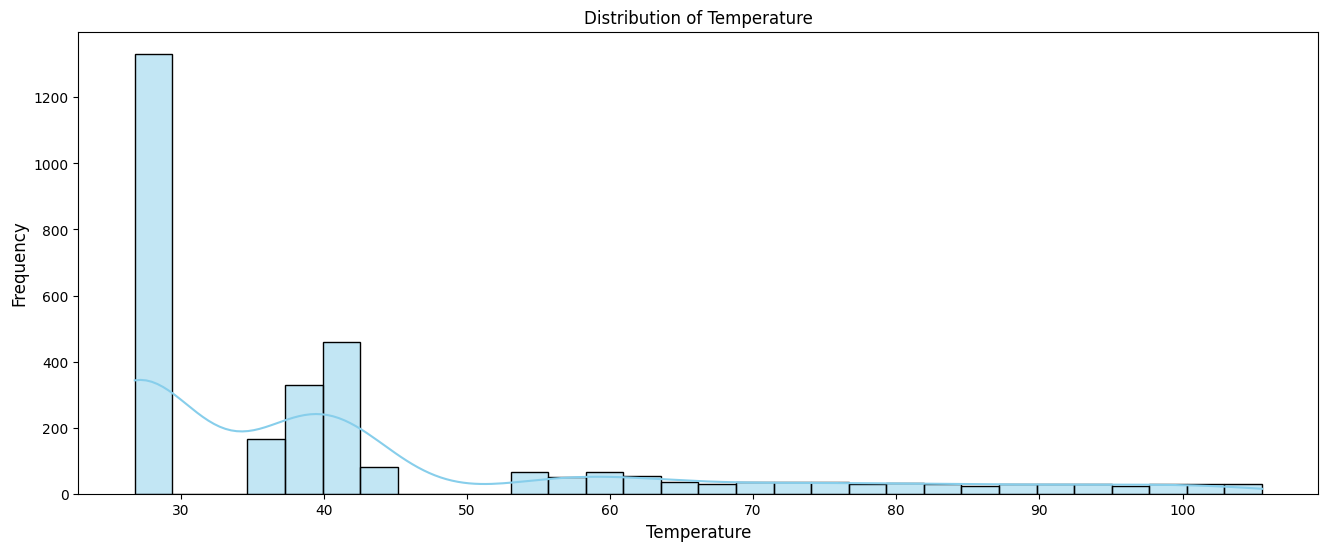

In [49]:
plt.figure(figsize=(16, 6))
sns.histplot(data= df_new, x= 'Temperature', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
plt.show()

## Re-plot categorical columns after removing Rainfall outlier

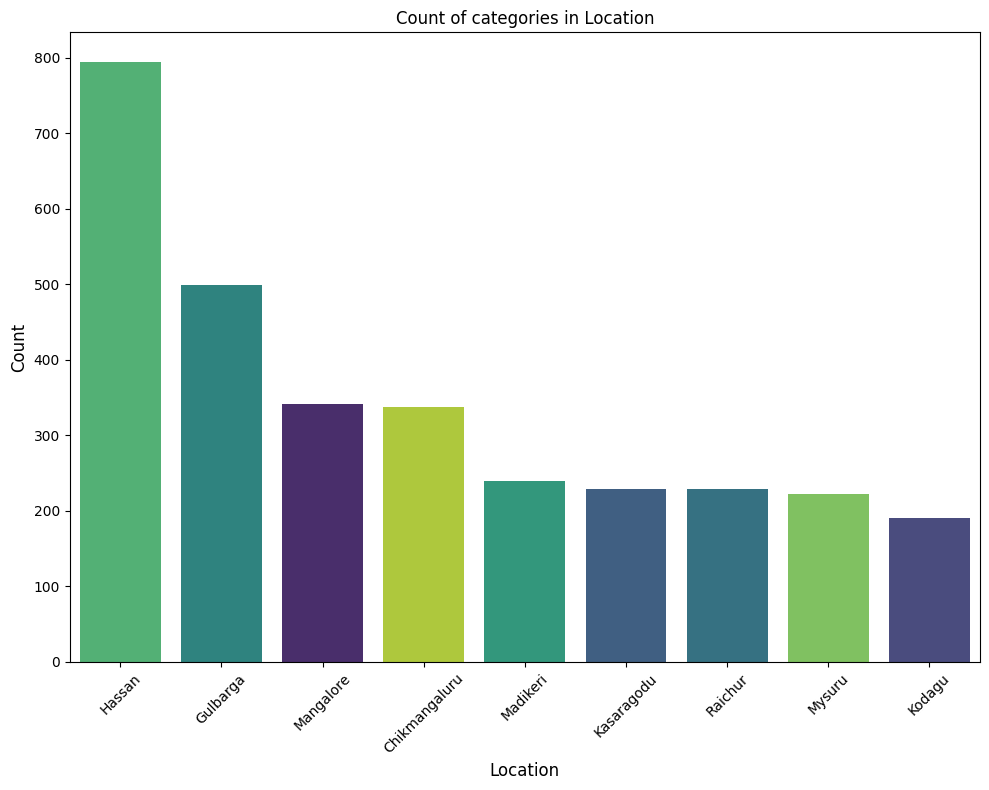

------------------------------------------------------------


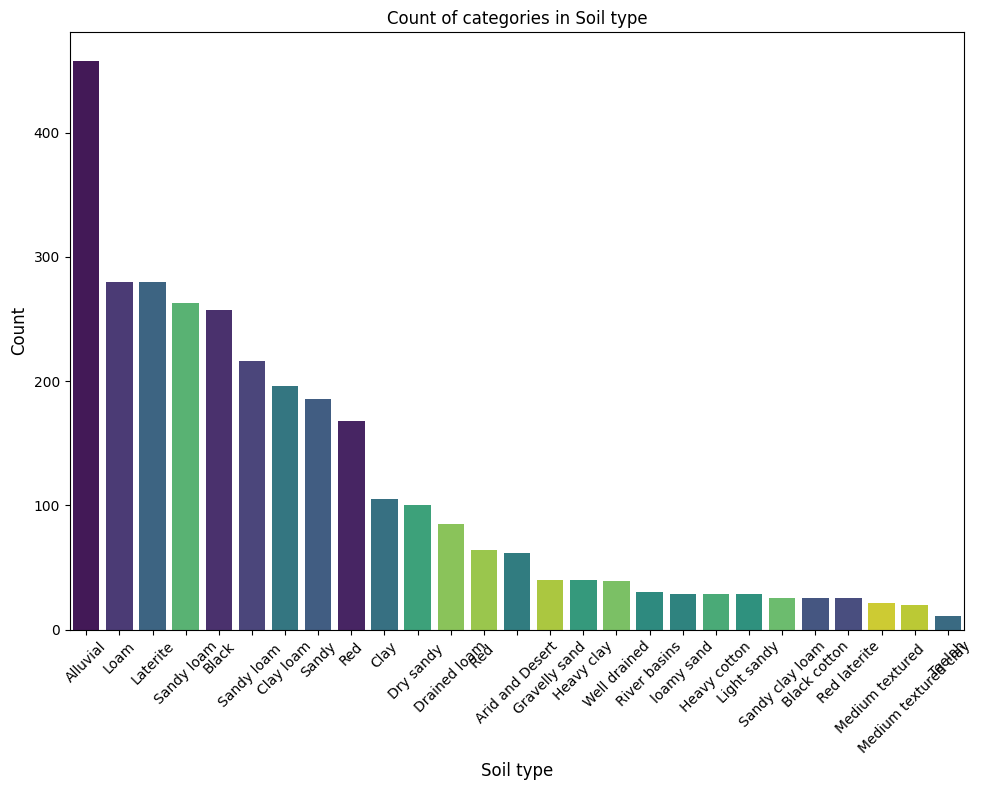

------------------------------------------------------------


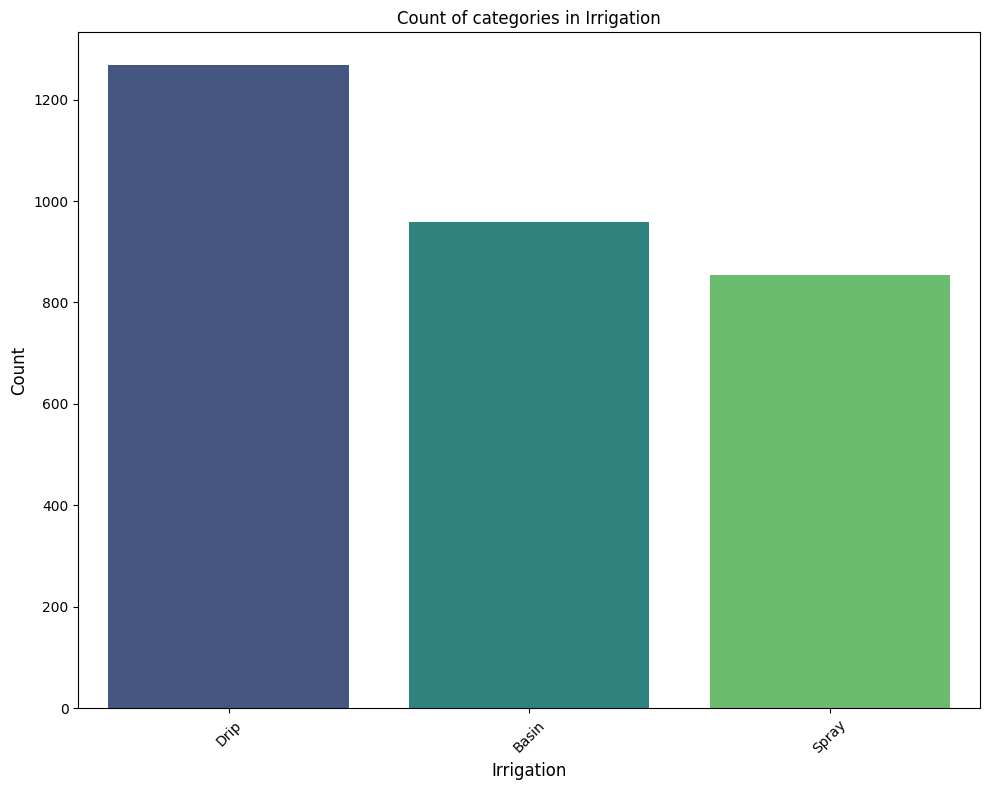

------------------------------------------------------------


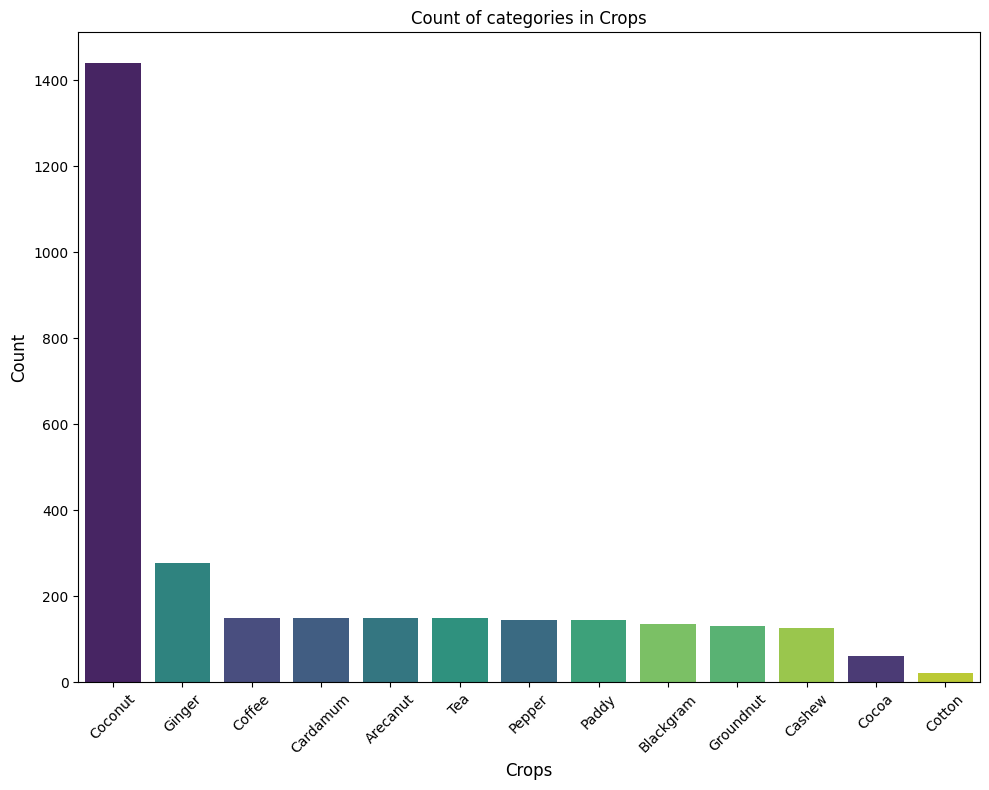

------------------------------------------------------------


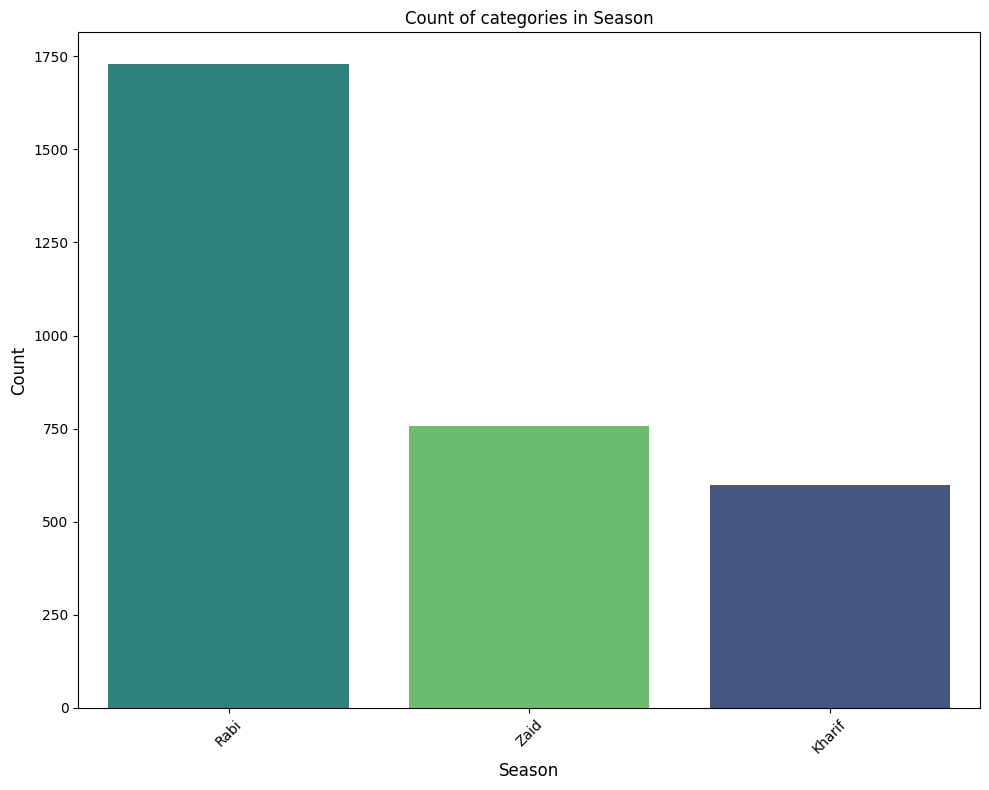

------------------------------------------------------------


In [50]:
categorical_cols = ['Location', 'Soil type', 'Irrigation', 'Crops', 'Season']

for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 8))
        sns.countplot(data=df_new, x=col, hue=col, order=df[col].value_counts().index, palette='viridis', legend=False)
        plt.title(f'Count of categories in {col}')
        plt.xticks(rotation=45)
        plt.xlabel(f'{col}', fontsize= 12)
        plt.ylabel('Count', fontsize= 12)
        plt.tight_layout()
        plt.show()
        print('------' * 10)

In [51]:
seasonal_avg = df_new.groupby(['Year', 'Season'])['Temperature'].mean().reset_index()

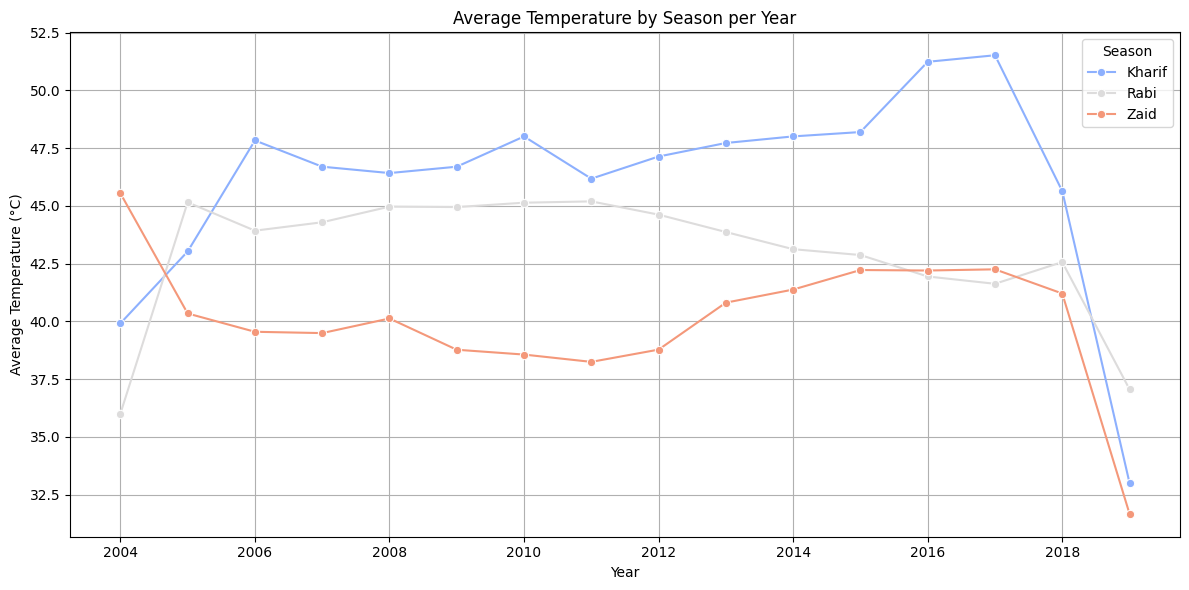

In [52]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_avg, x='Year', y='Temperature', hue='Season', marker='o', palette='coolwarm')

plt.title('Average Temperature by Season per Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.legend(title='Season')
plt.tight_layout()
plt.show()


In [53]:
seasonal_humidity = df_new.groupby(['Year', 'Season'])['Humidity'].mean().reset_index()

In [54]:
print(seasonal_humidity)

    Year  Season   Humidity
0   2004  Kharif  55.484397
1   2004    Rabi  55.595329
2   2004    Zaid  55.528912
3   2005  Kharif  55.710714
4   2005    Rabi  55.661111
5   2005    Zaid  55.717857
6   2006  Kharif  55.423077
7   2006    Rabi  55.794286
8   2006    Zaid  55.833333
9   2007  Kharif  55.948148
10  2007    Rabi  55.535714
11  2007    Zaid  56.129630
12  2008  Kharif  55.607407
13  2008    Rabi  56.045714
14  2008    Zaid  55.318519
15  2009  Kharif  55.392593
16  2009    Rabi  55.594286
17  2009    Zaid  55.365385
18  2010  Kharif  55.982143
19  2010    Rabi  55.731429
20  2010    Zaid  55.540000
21  2011  Kharif  55.071429
22  2011    Rabi  55.747222
23  2011    Zaid  55.096296
24  2012  Kharif  54.758065
25  2012    Rabi  55.952500
26  2012    Zaid  55.075862
27  2013  Kharif  55.178378
28  2013    Rabi  55.747170
29  2013    Zaid  55.794737
30  2014  Kharif  54.932432
31  2014    Rabi  55.649057
32  2014    Zaid  55.857895
33  2015  Kharif  55.502703
34  2015    Rabi  55

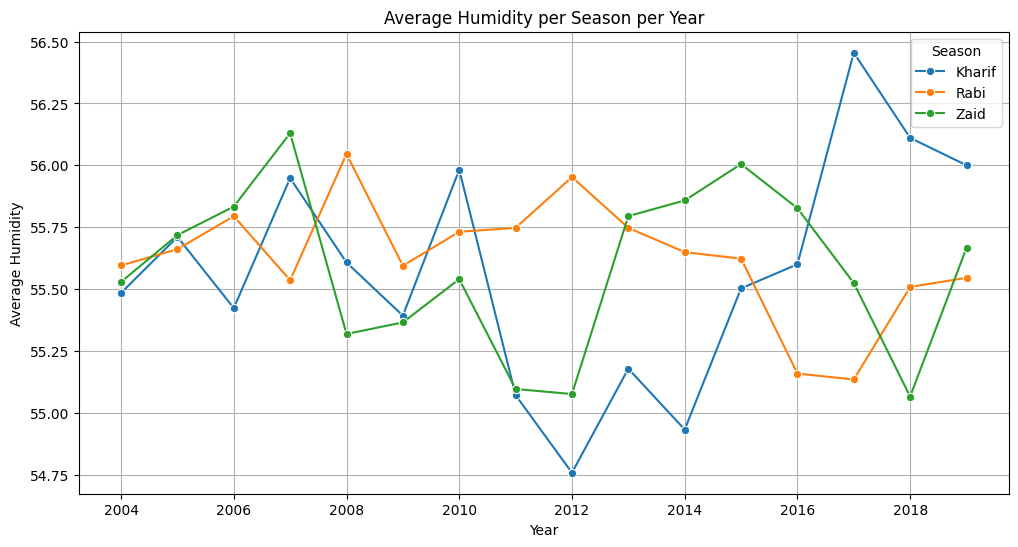

In [55]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_humidity, x='Year', y='Humidity', hue='Season', marker='o')
plt.title('Average Humidity per Season per Year')
plt.ylabel('Average Humidity')
plt.grid(True)
plt.show()


In [56]:
seasonal_Rainfall = df_new.groupby(['Year', 'Season'])['Rainfall'].mean().reset_index()

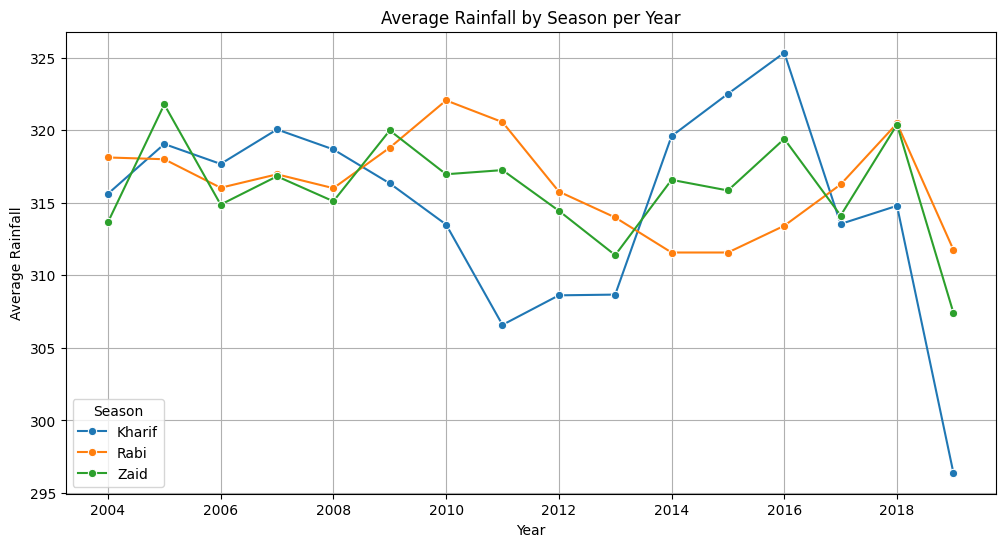

In [57]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_Rainfall, x='Year', y='Rainfall', hue='Season', marker='o')
plt.title('Average Rainfall by Season per Year')
plt.ylabel('Average Rainfall')
plt.grid(True)
plt.show()

In [58]:
yearly_yields = df_new.groupby('Year')['yields'].mean().reset_index()

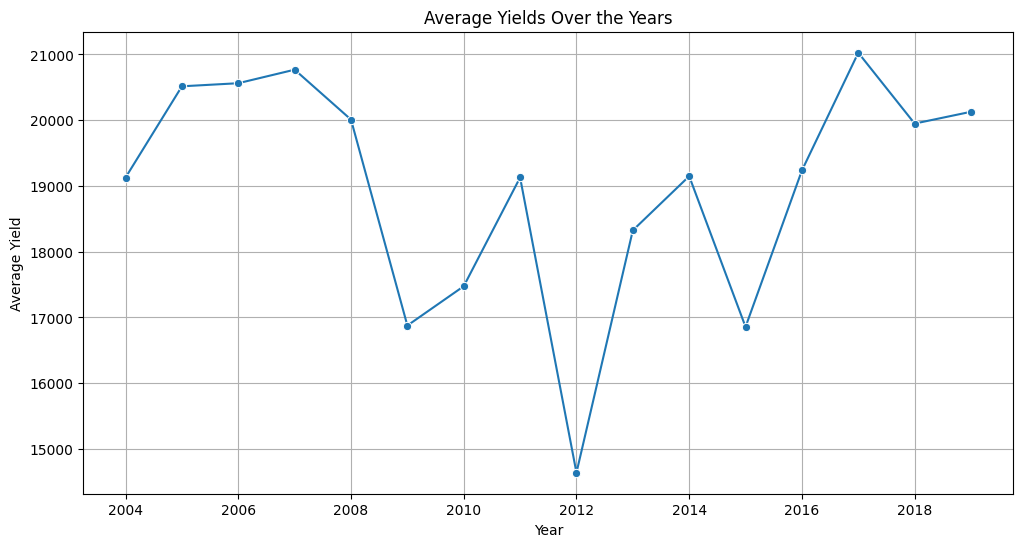

In [59]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_yields, x='Year', y='yields', marker='o')
plt.title('Average Yields Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.grid(True)
plt.show()

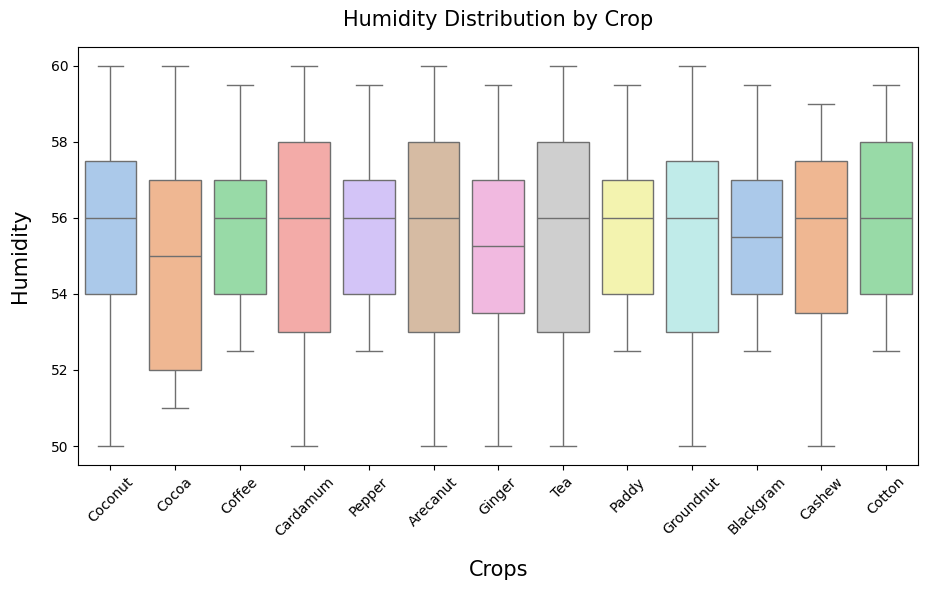

In [60]:
plt.figure(figsize=(12,6))
sns.boxplot(data= df_new, x= 'Crops', y= 'Humidity',hue= 'Crops', palette= 'pastel', legend=False)
plt.title('Humidity Distribution by Crop', fontsize= 15, pad=15)
plt.xlabel('Crops', fontsize= 15, labelpad=15)
plt.ylabel('Humidity', fontsize= 15, labelpad=15)
plt.xticks(rotation= 45)
plt.tight_layout()
plt.subplots_adjust(left=0.15, right=0.85)  # Adjust margins
plt.show()

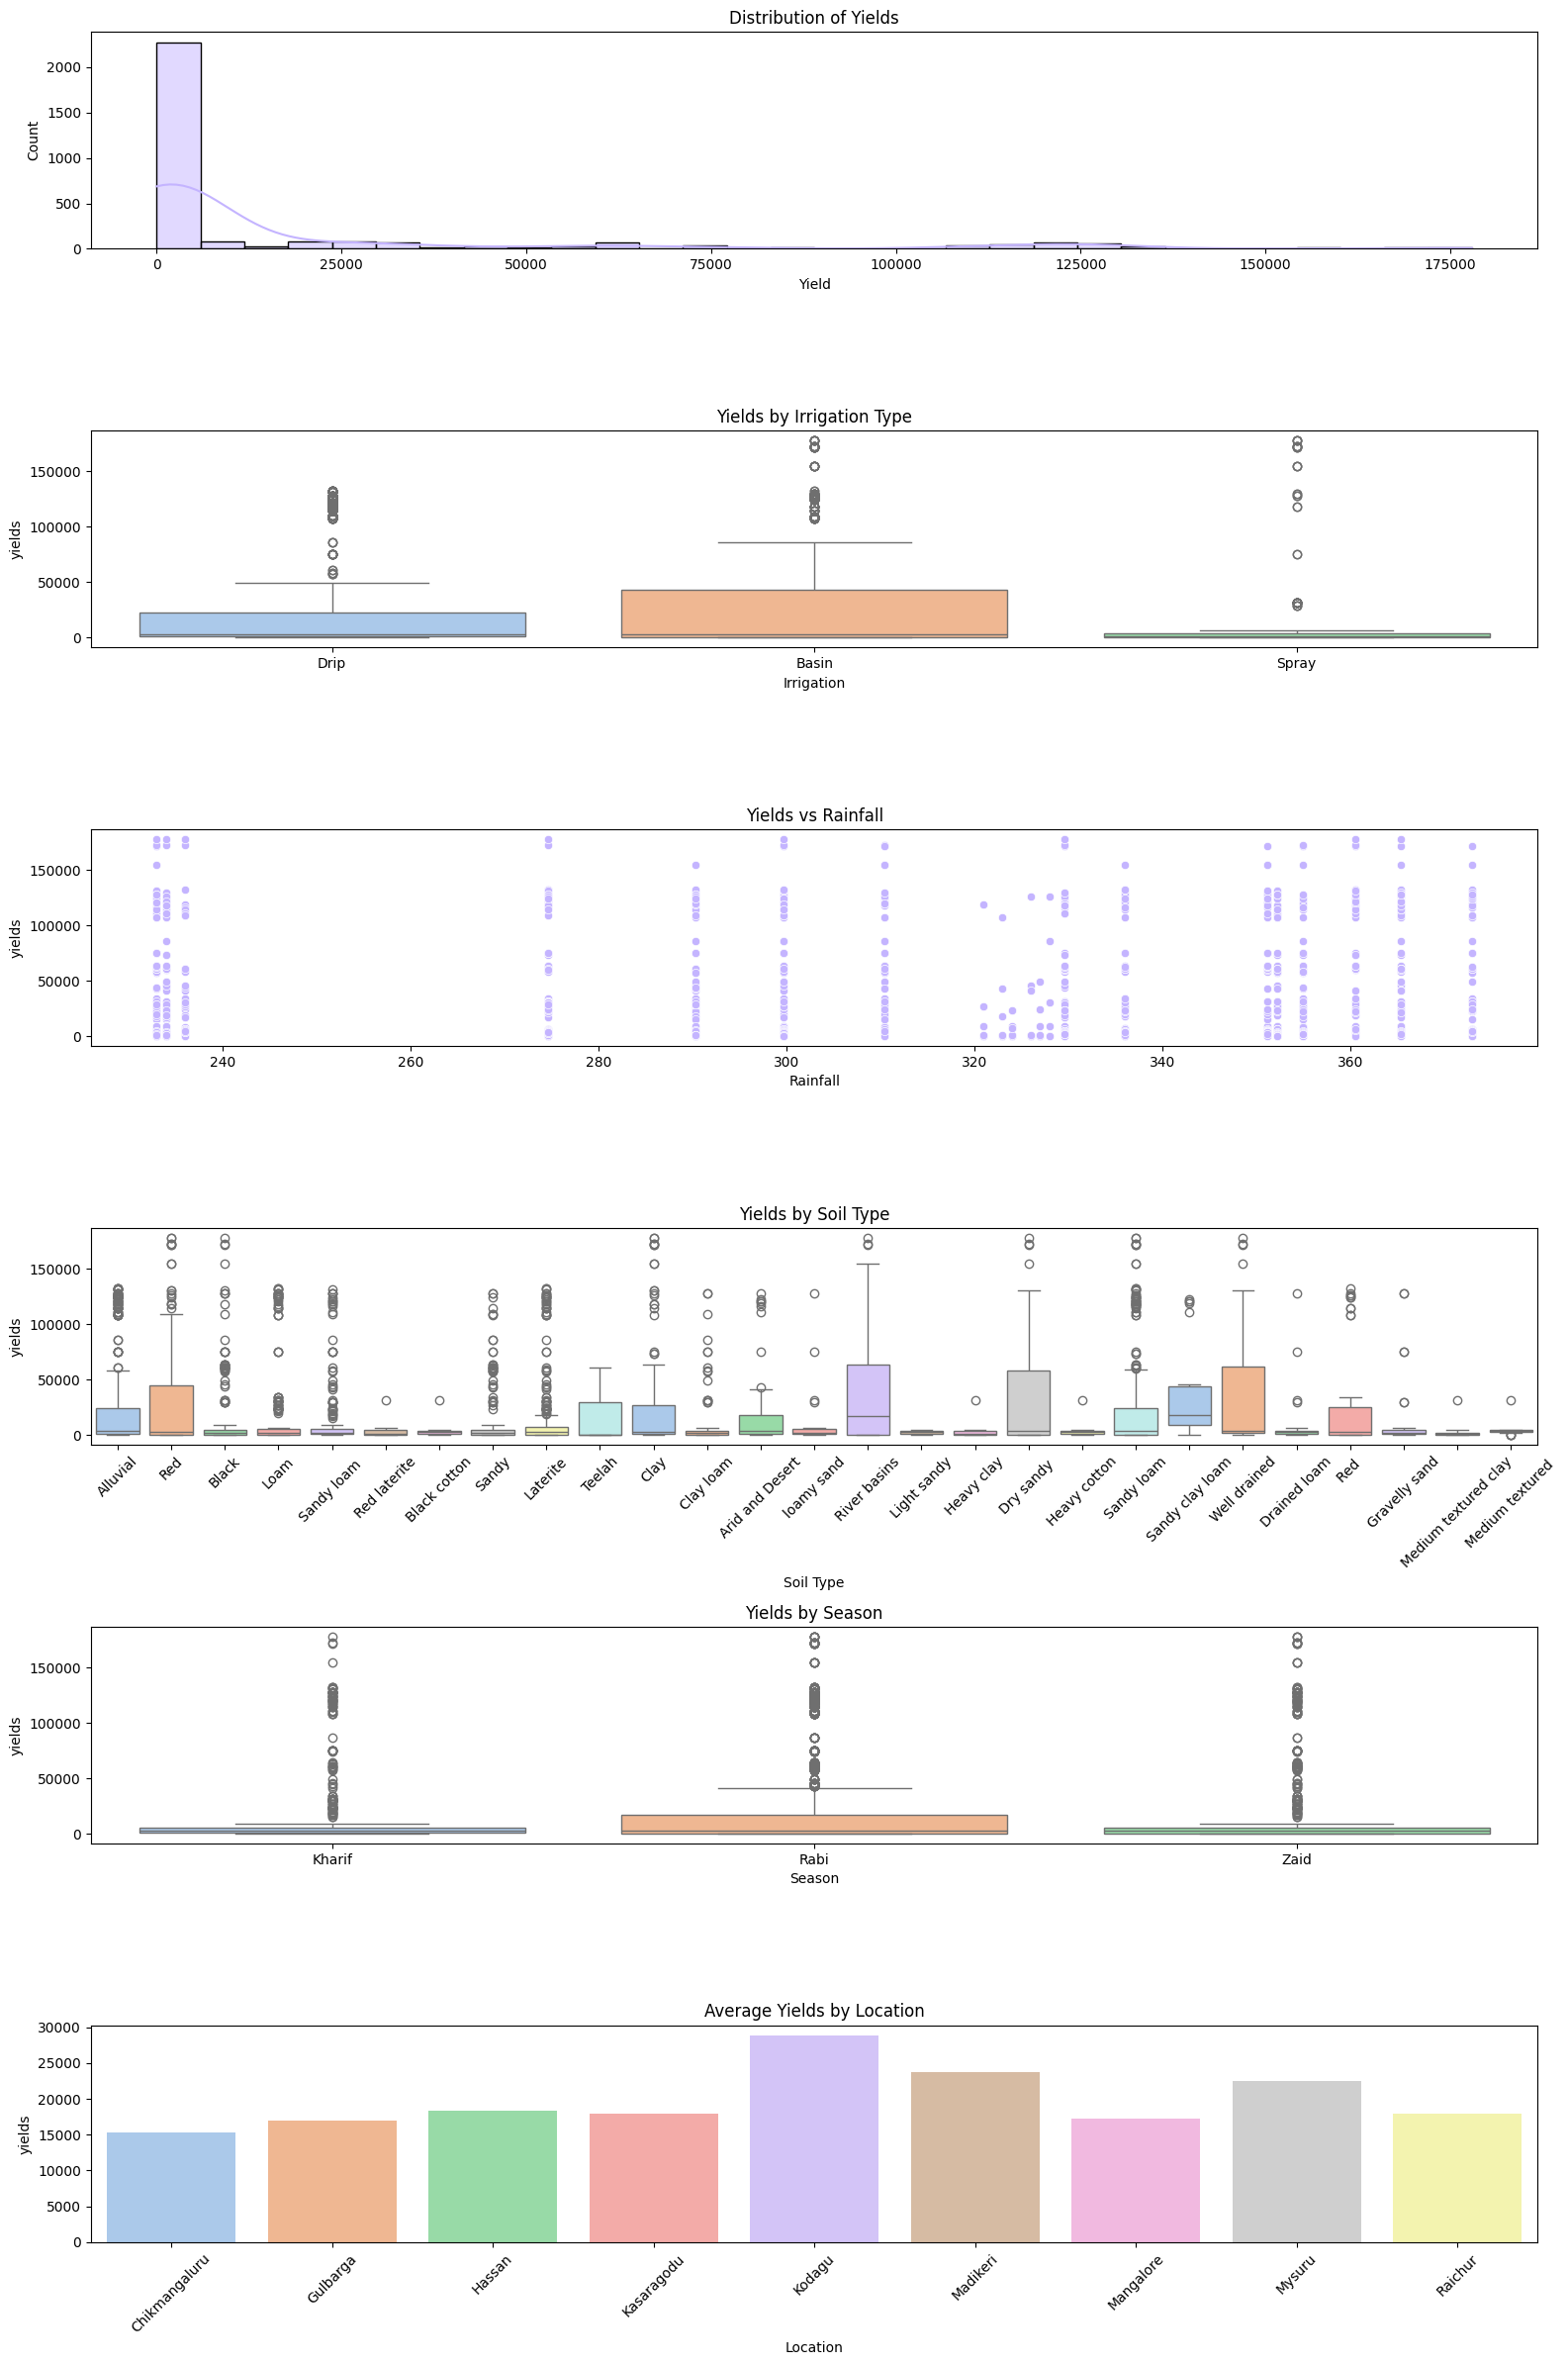

In [61]:
fig, axs = plt.subplots(6, 1, figsize=(16, 24))  # 6 rows × 1 columns
#plt.subplots_adjust(hspace=0.4, wspace=0.3)  # spacing between plots

# 1. Yield Distribution
sns.histplot(df_new['yields'], bins=30, kde=True, color= '#C4B4FF', ax=axs[0])
axs[0].set_title('Distribution of Yields')
axs[0].set_xlabel('Yield')

# 2. Yields vs Irrigation
sns.boxplot(data=df_new, x='Irrigation', y='yields', hue= 'Irrigation', palette='pastel', ax=axs[1])
axs[1].set_title('Yields by Irrigation Type')
axs[1].set_xlabel('Irrigation')

# 3. Yields vs Rainfall
sns.scatterplot(data=df_new, x='Rainfall', y='yields', color='#C4B4FF',  ax=axs[2])
axs[2].set_title('Yields vs Rainfall')
axs[2].set_xlabel('Rainfall')

# 4. Yields vs Soil Type
sns.boxplot(data=df_new, x='Soil type', y='yields', hue='Soil type', palette= 'pastel',  ax=axs[3])
axs[3].set_title('Yields by Soil Type')
axs[3].set_xlabel('Soil Type')
axs[3].tick_params(axis='x', rotation=45)

# 5. Yields vs Season
sns.boxplot(data=df_new, x='Season', y='yields', hue= 'Season', palette='pastel',  ax=axs[4])
axs[4].set_title('Yields by Season')
axs[4].set_xlabel('Season')

# 6. Yields vs Location (average bar plot)
location_yields = df_new.groupby('Location')['yields'].mean().reset_index()
sns.barplot(data=location_yields, x='Location', y='yields', hue='Location', palette='pastel',  ax=axs[5])
axs[5].set_title('Average Yields by Location')
axs[5].set_xlabel('Location')
axs[5].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
